In [3621]:
# Source the package setup script
source("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/scripts/00_setup_packages.R");

# Source the graphing functions
source("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/scripts/01_graphing_functions.R", local = knitr:::knit_global())

The C++ toolchain required for CmdStan is setup properly!

* Installing CmdStan from https://github.com/stan-dev/cmdstan/releases/download/v2.32.1/cmdstan-2.32.1.tar.gz

Warning message:
"An installation already exists at C:\Users\bmc82/.cmdstan/cmdstan-2.32.1. Please remove or rename the installation folder or set overwrite=TRUE."


# Population Structure Statistical Analyses

## Questions

- How does P. cristatus abundance, sex ratios, and morph ratios change with environmental factors (**microhabitat**, **site**)? 
- How does P. cristatus size change with sex and lifestage?
- How does female P. cristatus size change with fecundity?
- How does aeolid nudibranch abundance change with these same environmental factors (**microhabitat**, **site**)?

## Objective

- Test for differences in abundance, sex ratios, and morph ratios between different microhabitats and sites. 
- Test for differences in size (**body length**, **dorsal surface area**) between sexes. 
- Test for differences in size (**body length**, **dorsal surface area**) between lifestages. 
- Test for relationship of body size to fecundity in females.


## Method

### 1. Load cleaned data.

We start by loading the cleaned data from the "01_data_cleaning" pipeline. This data has already undergone transformations and contains relevant metrics for our models.


In [3622]:
data_pop_clean_lifestage <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_pop_clean_lifestage.csv")

data_pop_clean_sex <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_pop_clean_sex.csv")

data_pop_clean_sex_SA <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_pop_clean_sex_SA.csv")

data_pop_clean_morph <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_pop_clean_morph.csv")

data_pop_clean_fecundity <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_pop_clean_fecundity.csv")

data_pop_clean_fecundity_SA <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_pop_clean_fecundity_SA.csv")

data_count_clean <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_count_clean.csv")

data_microhabitat_count_clean <- read.csv("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/data/cleaned/data_microhabitat_count_clean.csv")


### 2. Prepare data.

Make sure R recognizes categorical variables as factors and continuous variables as numeric.

In [3623]:
# Convert continuous variables to numeric, if not already done so
# Define the columns to convert to numeric
columns_to_convert_pop <- c("Size", "Fecundity", "Surface_area")
columns_to_convert_count <- c("Count_Pod", "Count_Pod_F", "Count_Pod_M", "Count_Pod_Bright", "Count_Pod_Other", "Count_Pod_RB", "Count_Pod_W", "Count_Nudie_Aeolid", "Count_Nudie_Dorid")
columns_to_convert_microhabitat_count <- c("Count")

# Convert columns
data_pop_clean_lifestage <- data_pop_clean_lifestage %>%
    mutate(across(all_of(columns_to_convert_pop), as.numeric))

data_pop_clean_sex <- data_pop_clean_sex %>%
    mutate(across(all_of(columns_to_convert_pop), as.numeric))

data_pop_clean_sex_SA <- data_pop_clean_sex_SA %>%
    mutate(across(all_of(columns_to_convert_pop), as.numeric))

data_pop_clean_morph <- data_pop_clean_morph %>%
    mutate(across(all_of(columns_to_convert_pop), as.numeric))

data_pop_clean_fecundity <- data_pop_clean_fecundity %>%
    mutate(across(all_of(columns_to_convert_pop), as.numeric))

data_pop_clean_fecundity_SA <- data_pop_clean_fecundity_SA %>%
    mutate(across(all_of(columns_to_convert_pop), as.numeric))

data_count_clean <- data_count_clean %>%
    mutate(across(all_of(columns_to_convert_count), as.numeric))

data_microhabitat_count_clean <- data_microhabitat_count_clean %>%
    mutate(across(all_of(columns_to_convert_microhabitat_count), as.numeric))


# Convert binary/categorical variables to factors, if not already done so
# Define the columns to convert to factor
columns_to_convert_pop <- c("Sex", "Lifestage", "Morph", "Morph2")
columns_to_convert_count <- c("Site", "Microhabitat", "Microhabitat_cat")
columns_to_convert_microhabitat_count <- c("Site", "Quadrat", "Microhabitat_original", "Microhabitat", "Microhabitat_cat", "Group_1", "Group_2")

# Convert columns
data_pop_clean_lifestage <- data_pop_clean_lifestage %>%
    mutate(across(all_of(columns_to_convert_pop), as.factor))

data_pop_clean_sex <- data_pop_clean_sex %>%
    mutate(across(all_of(columns_to_convert_pop), as.factor))

data_pop_clean_sex_SA <- data_pop_clean_sex_SA %>%
    mutate(across(all_of(columns_to_convert_pop), as.factor))

data_pop_clean_morph <- data_pop_clean_morph %>%
    mutate(across(all_of(columns_to_convert_pop), as.factor))

data_pop_clean_fecundity <- data_pop_clean_fecundity %>%
    mutate(across(all_of(columns_to_convert_pop), as.factor))

data_pop_clean_fecundity_SA <- data_pop_clean_fecundity_SA %>%
    mutate(across(all_of(columns_to_convert_pop), as.factor))

data_count_clean <- data_count_clean %>%
    mutate(across(all_of(columns_to_convert_count), as.factor))

data_microhabitat_count_clean <- data_microhabitat_count_clean %>%
    mutate(across(all_of(columns_to_convert_microhabitat_count), as.factor))


### 2. Normality Tests
In this section, we test whether the continuous variables meet normality assumptions. If the p-value is less than or equal to 0.05, the null hypothesis of normality is rejected, indicating that the data does not fit a normal distribution. In this case, we will default to non-parametric tests.

#### **Individual-Level Normality Checks**

In [3624]:
# Test normality of continuous variables (Size, Fecundity, etc.)
# from the individually-cleaned datasets
#--------------------------------------
# Sex comparisons
sw_sex_m_size <- shapiro.test(subset(data_pop_clean_sex, Sex == "M")$Size)
sw_sex_f_size <- shapiro.test(subset(data_pop_clean_sex, Sex == "F")$Size)

# Surface Area (SA)
sw_sex_m_size_SA <- shapiro.test(subset(data_pop_clean_sex_SA, Sex == "M")$Size)
sw_sex_f_size_SA <- shapiro.test(subset(data_pop_clean_sex_SA, Sex == "F")$Size)

# Lifestage comparisons
sw_adult_size <- shapiro.test(subset(data_pop_clean_lifestage, Lifestage == "A")$Size)
sw_juvenile_size <- shapiro.test(subset(data_pop_clean_lifestage, Lifestage == "J")$Size)

# Morph2 comparisons
sw_morph_RB <- shapiro.test(subset(data_pop_clean_morph, Morph2 == "RB")$Size)
sw_morph_W <- shapiro.test(subset(data_pop_clean_morph, Morph2 == "W")$Size)
sw_morph_Bright <- shapiro.test(subset(data_pop_clean_morph, Morph2 == "Bright")$Size)
sw_morph_Other <- shapiro.test(subset(data_pop_clean_morph, Morph2 == "Other")$Size)

# Fecundity
sw_fecundity <- shapiro.test(data_pop_clean_fecundity$Fecundity)

In [3625]:
# Create the summary table manually from the test results
shapiro_summary <- data.frame(
  Group = c(
    "Males (Body Length)",
    "Females (Body Length)",
    "Males (Surface Area)",
    "Females (Surface Area)",
    "Adults (Body Length)",
    "Juveniles (Body Length)",
    "Morph2 RB (Body Length)",
    "Morph2 W (Body Length)",
    "Morph2 Bright (Body Length)",
    "Morph2 Other (Body Length)",
    "Fecundity (Females)"
  ),
  n = c(
    length(subset(data_pop_clean_sex, Sex == "M")$Size),
    length(subset(data_pop_clean_sex, Sex == "F")$Size),
    length(subset(data_pop_clean_sex_SA, Sex == "M")$Size),
    length(subset(data_pop_clean_sex_SA, Sex == "F")$Size),
    length(subset(data_pop_clean_lifestage, Lifestage == "A")$Size),
    length(subset(data_pop_clean_lifestage, Lifestage == "J")$Size),
    length(subset(data_pop_clean_morph, Morph2 == "RB")$Size),
    length(subset(data_pop_clean_morph, Morph2 == "W")$Size),
    length(subset(data_pop_clean_morph, Morph2 == "Bright")$Size),
    length(subset(data_pop_clean_morph, Morph2 == "Other")$Size),
    length(data_pop_clean_fecundity$Fecundity)
  ),
  W_statistic = c(
    sw_sex_m_size$statistic,
    sw_sex_f_size$statistic,
    sw_sex_m_size_SA$statistic,
    sw_sex_f_size_SA$statistic,
    sw_adult_size$statistic,
    sw_juvenile_size$statistic,
    sw_morph_RB$statistic,
    sw_morph_W$statistic,
    sw_morph_Bright$statistic,
    sw_morph_Other$statistic,
    sw_fecundity$statistic
  ),
  p_value = c(
    sw_sex_m_size$p.value,
    sw_sex_f_size$p.value,
    sw_sex_m_size_SA$p.value,
    sw_sex_f_size_SA$p.value,
    sw_adult_size$p.value,
    sw_juvenile_size$p.value,
    sw_morph_RB$p.value,
    sw_morph_W$p.value,
    sw_morph_Bright$p.value,
    sw_morph_Other$p.value,
    sw_fecundity$p.value
  ),
  Method = c(
    sw_sex_m_size$method,
    sw_sex_f_size$method,
    sw_sex_m_size_SA$method,
    sw_sex_f_size_SA$method,
    sw_adult_size$method,
    sw_juvenile_size$method,
    sw_morph_RB$method,
    sw_morph_W$method,
    sw_morph_Bright$method,
    sw_morph_Other$method,
    sw_fecundity$method
  )
)

shapiro_summary$p_value <- ifelse(
  shapiro_summary$p_value < 0.001, 
  "< 0.001", 
  round(shapiro_summary$p_value, 3)
)

# Create the table as HTML
shapiro_count_table <- shapiro_summary %>%
  kbl(
    caption = "Shapiro-Wilk Normality Test Results for Count Data",
    digits = 3,
    align = 'lcccl'
  ) %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()  # Convert it to raw HTML

# Display the table in Jupyter
IRdisplay::display_html(shapiro_count_table)

Group,n,W_statistic,p_value,Method
Males (Body Length),227,0.987,0.033,Shapiro-Wilk normality test
Females (Body Length),136,0.982,0.077,Shapiro-Wilk normality test
Males (Surface Area),114,0.986,0.292,Shapiro-Wilk normality test
Females (Surface Area),86,0.986,0.481,Shapiro-Wilk normality test
Adults (Body Length),363,0.991,0.025,Shapiro-Wilk normality test
Juveniles (Body Length),32,0.886,0.003,Shapiro-Wilk normality test
Morph2 RB (Body Length),284,0.986,0.007,Shapiro-Wilk normality test
Morph2 W (Body Length),48,0.975,0.39,Shapiro-Wilk normality test
Morph2 Bright (Body Length),14,0.968,0.844,Shapiro-Wilk normality test
Morph2 Other (Body Length),17,0.951,0.465,Shapiro-Wilk normality test


#### **Count Data Normality Checks**

In [3626]:
# Test normality of count data (pods, nudibranchs, morphs)
#--------------------------------------
sw_count <- shapiro.test(data_count_clean$Count_Pod)
sw_count_M <- shapiro.test(data_count_clean$Count_Pod_M)
sw_count_F <- shapiro.test(data_count_clean$Count_Pod_F)
sw_count_Bright <- shapiro.test(data_count_clean$Count_Pod_Bright)
sw_count_Other <- shapiro.test(data_count_clean$Count_Pod_Other)
sw_count_RB <- shapiro.test(data_count_clean$Count_Pod_RB)
sw_count_W <- shapiro.test(data_count_clean$Count_Pod_W)
sw_count_Nudie <- shapiro.test(data_count_clean$Count_Nudie_Aeolid)

In [3627]:
# Create the summary table manually from the test results
shapiro_count_summary <- data.frame(
  Group = c(
    "Total Count",
    "Male Count",
    "Female Count",
    "Bright Morph2 Count",
    "Other Morph2 Count",
    "RB Morph Count",
    "W Morph Count",
    "Aeolid Nudibranch Count"
  ),
  n = c(
    length(data_count_clean$Count_Pod),
    length(data_count_clean$Count_Pod_M),
    length(data_count_clean$Count_Pod_F),
    length(data_count_clean$Count_Pod_Bright),
    length(data_count_clean$Count_Pod_Other),
    length(data_count_clean$Count_Pod_RB),
    length(data_count_clean$Count_Pod_W),
    length(data_count_clean$Count_Nudie_Aeolid)
  ),
  W_statistic = c(
    sw_count$statistic,
    sw_count_M$statistic,
    sw_count_F$statistic,
    sw_count_Bright$statistic,
    sw_count_Other$statistic,
    sw_count_RB$statistic,
    sw_count_W$statistic,
    sw_count_Nudie$statistic
  ),
  p_value = c(
    sw_count$p.value,
    sw_count_M$p.value,
    sw_count_F$p.value,
    sw_count_Bright$p.value,
    sw_count_Other$p.value,
    sw_count_RB$p.value,
    sw_count_W$p.value,
    sw_count_Nudie$p.value
  ),
  Method = c(
    sw_count$method,
    sw_count_M$method,
    sw_count_F$method,
    sw_count_Bright$method,
    sw_count_Other$method,
    sw_count_RB$method,
    sw_count_W$method,
    sw_count_Nudie$method
  )
)

shapiro_count_summary$p_value <- ifelse(
  shapiro_count_summary$p_value < 0.001, 
  "< 0.001", 
  round(shapiro_count_summary$p_value, 3)
)

# Create the table as HTML
shapiro_count_table <- shapiro_count_summary %>%
  kbl(
    caption = "Shapiro-Wilk Normality Test Results for Count Data",
    digits = 3,
    align = 'lcccl'
  ) %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()  # Convert it to raw HTML

# Display the table in Jupyter
IRdisplay::display_html(shapiro_count_table)

Group,n,W_statistic,p_value,Method
Total Count,355,0.427,< 0.001,Shapiro-Wilk normality test
Male Count,355,0.405,< 0.001,Shapiro-Wilk normality test
Female Count,355,0.282,< 0.001,Shapiro-Wilk normality test
Bright Morph2 Count,355,0.104,< 0.001,Shapiro-Wilk normality test
Other Morph2 Count,355,0.106,< 0.001,Shapiro-Wilk normality test
RB Morph Count,355,0.388,< 0.001,Shapiro-Wilk normality test
W Morph Count,355,0.232,< 0.001,Shapiro-Wilk normality test
Aeolid Nudibranch Count,355,0.177,< 0.001,Shapiro-Wilk normality test


### 3. Size Investigation
Here, we explore differences in size by sex, lifestage, color morph, and fecundity. We retain the original code and visualizations.

#### **Body Length Comparison (M vs. F)**

In [3628]:
#--------------------------------------
# Summaries
summary_table <- data_pop_clean_sex %>%
  mutate(Sex = recode(Sex,
                        "M" = "Male",
                        "F" = "Female")) %>%
  group_by(Sex) %>%
  summarise(
    n = n(),
    Mean_Length = mean(Size, na.rm = TRUE),
    SD_Length = sd(Size, na.rm = TRUE),
    Min_Length = min(Size, na.rm = TRUE),
    SD_Length = max(Size, na.rm = TRUE)
  )

In [3629]:
html_table <- summary_table %>%
  kbl(caption = "Summary Statistics for Body Length") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Sex,n,Mean_Length,SD_Length,Min_Length
Female,136,6.886691,9.769,4.959
Male,227,6.187525,9.253,3.017


In [3630]:
# Run Wilcoxon rank-sum test
wilcox_result <- wilcox.test(Size ~ Sex, data = data_pop_clean_sex)

In [3631]:

# Format Wilcoxon result as a tibble
wilcox_table <- tibble(
  Sex = c("Female", "Male"),
  Test = "Wilcoxon rank-sum",
  Statistic = round(wilcox_result$statistic, 3),
  P_value = signif(wilcox_result$p.value, 3)
)

In [3632]:

# Create formatted HTML table
html_table <- kbl(wilcox_table, caption = "Wilcoxon Rank-Sum Test Summary") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Sex,Test,Statistic,P_value
Female,Wilcoxon rank-sum,19916,3.7e-06
Male,Wilcoxon rank-sum,19916,3.7e-06


In [ ]:

# Plot for Male vs Female sizes
#--------------------------------------
# Define fill and matching darker outline colors
fill_colors <- c("F" = "#E41A1C", "M" = "#999999")       # Red + light gray
outline_colors <- c("F" = "#990000", "M" = "#4d4d4d")    # Dark red + dark gray

plot_sex_size <- ggplot(data_pop_clean_sex, aes(x = Size, fill = Sex, color = Sex)) +
  geom_histogram(
    position = "identity",
    binwidth = 0.5,
    boundary = 0,
    alpha = 0.5,
    linewidth = 0.6
  ) +
  scale_fill_manual(values = fill_colors) +
  scale_color_manual(values = outline_colors) +
  scale_x_continuous(breaks = seq(floor(min(data_pop_clean_sex$Size)),
                                  ceiling(max(data_pop_clean_sex$Size)), 
                                  by = 1)) +  
  labs(
    title = NULL,
    x = "Body Length (mm)",
    y = "Frequency"
  ) +
  ggtitle("C") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    plot.title = element_text(size = 14),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_size.png", plot = plot_sex_size, width = 3, height = 3, units = "in", dpi = 300)


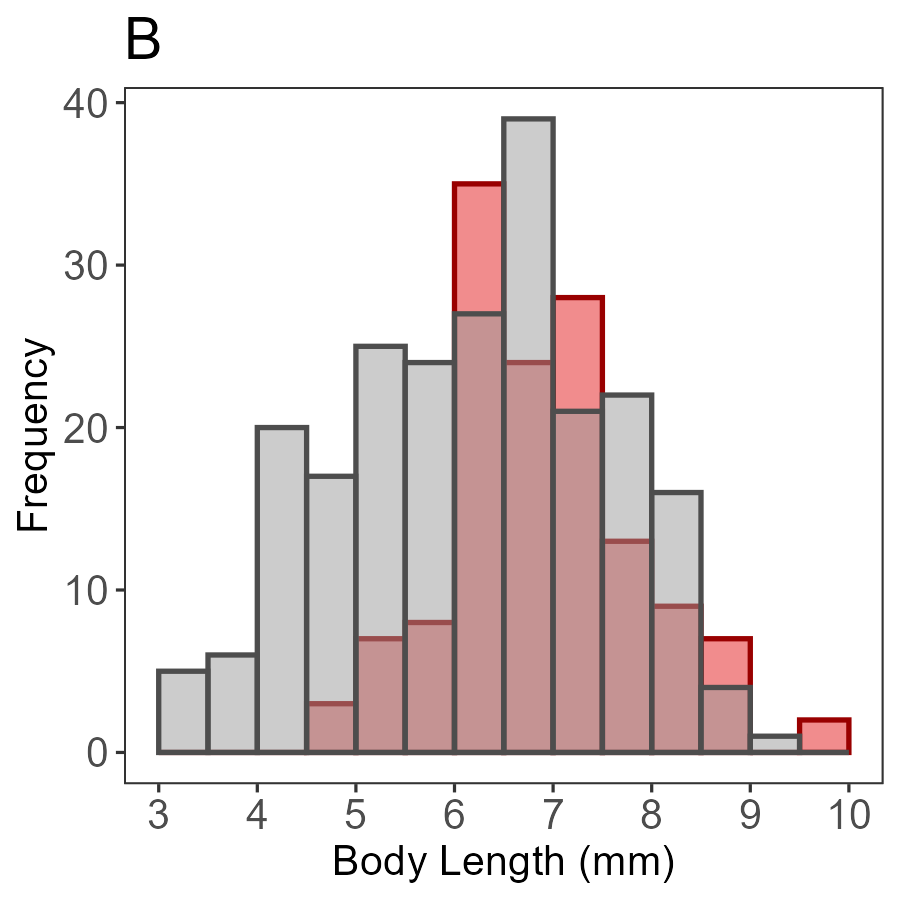

In [3634]:
# Convert images to base64
plot_sex_size <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_size.png")

# Create the HTML (vertical display)
html_plot_sex_size <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_sex_size, "' alt='Plots of Size by Sex'>
")

# Display the HTML
IRdisplay::display_html(html_plot_sex_size)

#### **Surface Area Comparison (M vs. F)**

In [3635]:
#--------------------------------------
summary_table <- data_pop_clean_sex_SA %>%
  mutate(Sex = recode(Sex,
                        "M" = "Male",
                        "F" = "Female")) %>%
  group_by(Sex) %>%
  summarise(
    n = n(),
    Mean_SA = mean(Surface_area, na.rm = TRUE),
    SD_SA = sd(Surface_area, na.rm = TRUE),
    Min_SA = min(Surface_area, na.rm = TRUE),
    SD_SA = max(Surface_area, na.rm = TRUE)
  )

In [3636]:
html_table <- summary_table %>%
  kbl(caption = "Summary Statistics for Dorsal Surface Area") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Sex,n,Mean_SA,SD_SA,Min_SA
Female,86,3.026411,5.612929,1.1145708
Male,114,1.389069,2.888462,0.3596236


In [3637]:

# Run Wilcoxon rank-sum test
wilcox_result <- wilcox.test(Surface_area ~ Sex, data = data_pop_clean_sex_SA)

In [3638]:

# Format Wilcoxon result as a tibble
wilcox_table <- tibble(
  Sex = c("Female", "Male"),
  Test = "Wilcoxon rank-sum",
  Statistic = round(wilcox_result$statistic, 3),
  P_value = signif(wilcox_result$p.value, 3)
)

In [3639]:

# Create formatted HTML table
html_table <- kbl(wilcox_table, caption = "Wilcoxon Rank-Sum Test Summary") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Sex,Test,Statistic,P_value
Female,Wilcoxon rank-sum,9143,0
Male,Wilcoxon rank-sum,9143,0


In [ ]:

# Plot
fill_colors <- c("F" = "#E41A1C", "M" = "#999999")       # Red + light gray
outline_colors <- c("F" = "#990000", "M" = "#4d4d4d")    # Dark red + dark gray

plot_sex_SA <- ggplot(data_pop_clean_sex_SA, aes(x = Surface_area, fill = Sex, color = Sex)) +
  geom_histogram(
    position = "identity",
    binwidth = 0.5,
    boundary = 0,
    alpha = 0.5,
    linewidth = 0.6
  ) +
  scale_fill_manual(values = fill_colors) +
  scale_color_manual(values = outline_colors) +
  scale_x_continuous(breaks = seq(floor(min(data_pop_clean_sex_SA$Surface_area)),
                                  ceiling(max(data_pop_clean_sex_SA$Surface_area)), 
                                  by = 1)) +  
  labs(title = NULL, 
       x = expression("Surface area" ~ (mm^2)), 
       y = "Frequency") +
  ggtitle("D") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major.x = element_blank(),
    panel.grid.major.y = element_blank(),
    panel.grid.minor.x = element_blank(),
    panel.grid.minor.y = element_blank(),
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    plot.title = element_text(size = 14),
    legend.position = "none"
  )


ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_SA.png", plot = plot_sex_SA, width = 3, height = 3, units = "in", dpi = 300)


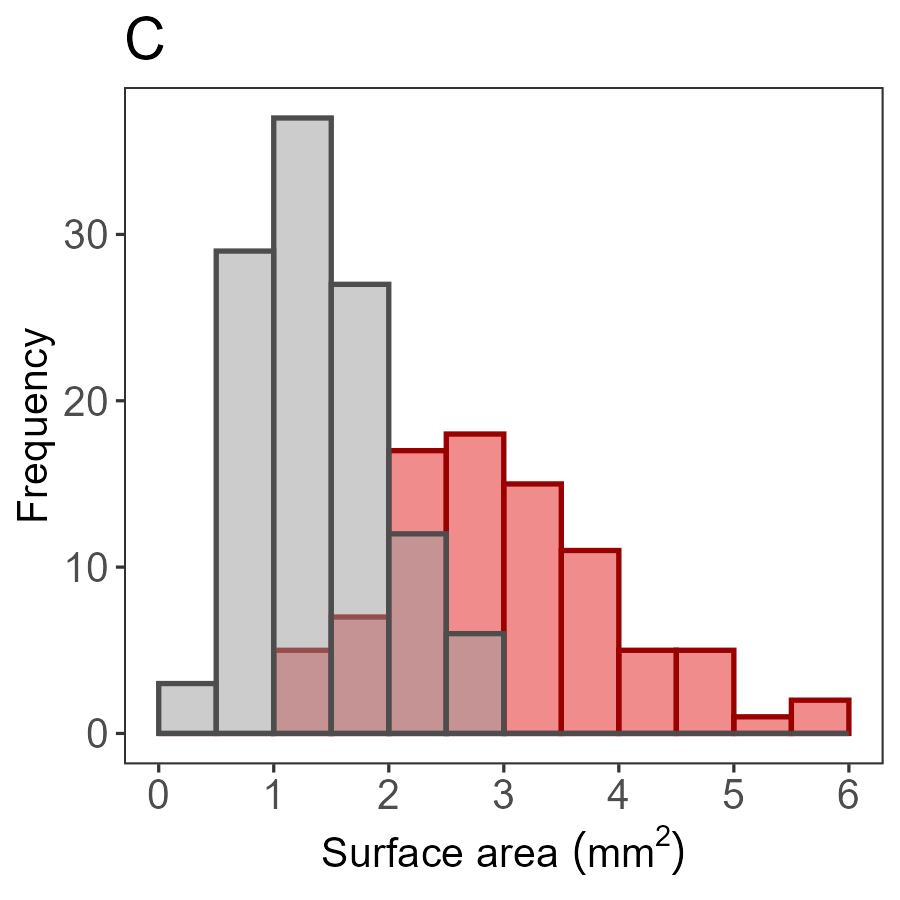

In [3641]:
# Convert images to base64
plot_sex_SA <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_SA.png")


# Create the HTML (vertical display)
html_plot_sex_SA <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_sex_SA, "' alt='Plot of Surface Area by Sex'>
")

# Display the HTML
IRdisplay::display_html(html_plot_sex_SA)

#### **Body Length vs. Surface Area (M vs. F)**

In [3642]:
# Run Spearman correlations
cor_m <- cor.test(
  data_pop_clean_sex_SA$Size[data_pop_clean_sex_SA$Sex == "M"],
  data_pop_clean_sex_SA$Surface_area[data_pop_clean_sex_SA$Sex == "M"],
  method = "spearman"
)

cor_f <- cor.test(
  data_pop_clean_sex_SA$Size[data_pop_clean_sex_SA$Sex == "F"],
  data_pop_clean_sex_SA$Surface_area[data_pop_clean_sex_SA$Sex == "F"],
  method = "spearman"
)

Warning message in cor.test.default(data_pop_clean_sex_SA$Size[data_pop_clean_sex_SA$Sex == :
"Cannot compute exact p-value with ties"


In [3643]:

# Format as a tibble
spearman_table <- tibble(
  Sex = c("Female", "Male"),
  Method = c(cor_m$method, cor_f$method),
  Statistic = round(c(cor_m$statistic, cor_f$statistic), 3),
  Rho = round(c(cor_m$estimate, cor_f$estimate), 3),
  P_value = signif(c(cor_m$p.value, cor_f$p.value), 4)
)

In [3644]:

# Create HTML table
html_table <- kbl(spearman_table, caption = "Spearman Correlation Between Size and Surface Area") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML
IRdisplay::display_html(html_table)

Sex,Method,Statistic,Rho,P_value
Female,Spearman's rank correlation rho,23596.1,0.904,0
Male,Spearman's rank correlation rho,18684.0,0.824,0


In [3645]:

# Scatter plot
plot_size_vs_SA <- ggplot(data_pop_clean_sex_SA, aes(x = Size, y = Surface_area, color = Sex, fill = Sex)) +
  geom_point(size = 2, shape = 21, stroke = 0.6) +  # Scatter points with fill color
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Trend lines by sex
  scale_x_continuous(breaks = seq(floor(min(data_pop_clean_sex_SA$Size, na.rm = TRUE)),
                                  ceiling(max(data_pop_clean_sex_SA$Size, na.rm = TRUE)),
                                  by = 1)) +
  scale_color_manual(values = c("M" = "black", "F" = "black")) +
  scale_fill_manual(values = c("M" = "#999999", "F" = "#f38c8c")) +
  labs(title = NULL, 
       x = "Body Length (mm)", 
       y = expression("Surface area" ~ (mm^2))) +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
    )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_size_vs_SA.png", plot = plot_size_vs_SA, width = 3, height = 3, units = "in", dpi = 300)

`geom_smooth()` using formula = 'y ~ x'



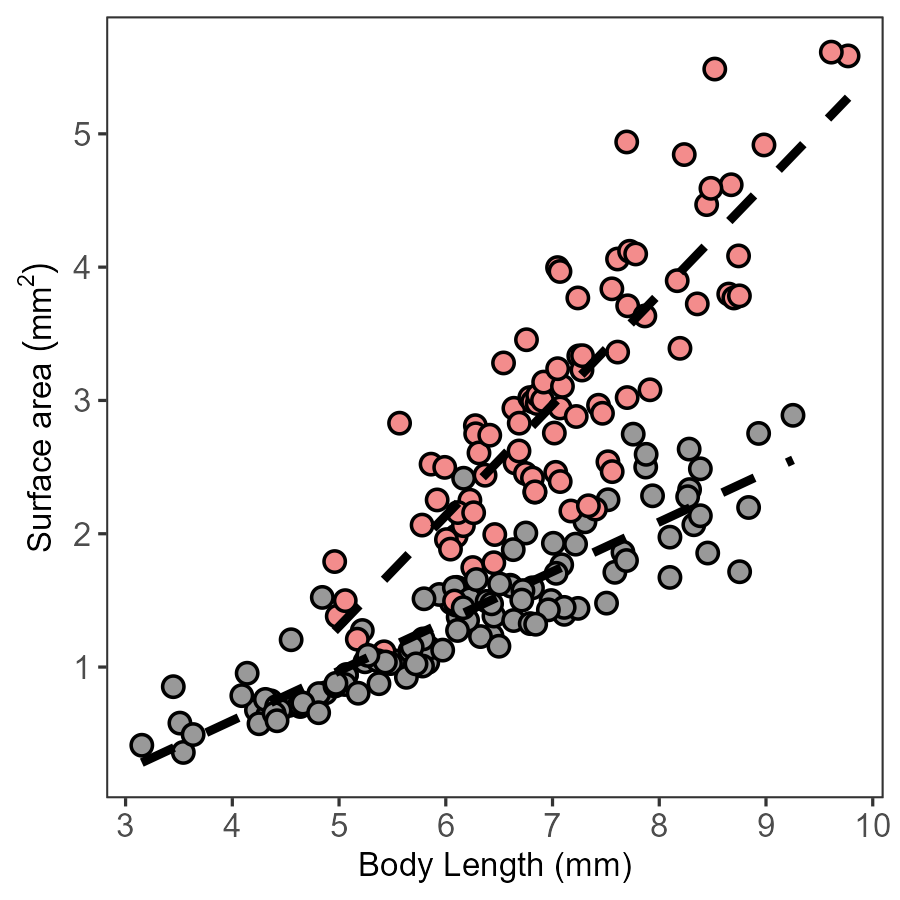

In [3646]:
# Convert images to base64
plot_size_vs_SA <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_size_vs_SA.png")

# Create the HTML (vertical display)
html_plot_size_vs_SA <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_size_vs_SA, "' alt='Plot of Size vs Surface Area'>
")

# Display the HTML
IRdisplay::display_html(html_plot_size_vs_SA)

#### **Body Length Comparison (Adults vs. Juveniles)**

In [3647]:
#--------------------------------------
summary_table <- data_pop_clean_lifestage %>%
  mutate(Lifestage = recode(Lifestage,
                        "A" = "Adult",
                        "J" = "Juvenile")) %>%
  group_by(Lifestage) %>%
  summarise(
    n = n(),
    Mean_Length = mean(Size, na.rm = TRUE),
    SD_Length = sd(Size, na.rm = TRUE),
    Min_Length = min(Size, na.rm = TRUE),
    SD_Length = max(Size, na.rm = TRUE)
  )

In [3648]:
html_table <- summary_table %>%
  kbl(caption = "Summary Statistics for Size based on Lifestage") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Lifestage,n,Mean_Length,SD_Length,Min_Length
Adult,363,6.449472,9.769,3.017
Juvenile,32,4.895344,5.600,3.349


In [3649]:
# Wilcoxon rank-sum test
wilcox_result <- wilcox.test(Size ~ Lifestage, data = data_pop_clean_lifestage)

In [3650]:
# Format Wilcoxon result as a tibble
wilcox_table <- tibble(
  Lifestage = c("Adult", "Juvenile"),
  Test = "Wilcoxon rank-sum",
  Statistic = round(wilcox_result$statistic, 3),
  P_value = signif(wilcox_result$p.value, 3)
)

In [3651]:

# Create formatted HTML table
html_table <- kbl(wilcox_table, caption = "Wilcoxon Rank-Sum Test Summary") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Lifestage,Test,Statistic,P_value
Adult,Wilcoxon rank-sum,10043.5,0
Juvenile,Wilcoxon rank-sum,10043.5,0


In [3652]:

# Plot for Adult vs. Juvenile sizes
plot_lifestage_size <- ggplot(data_pop_clean_lifestage, aes(x = Size, fill = Lifestage)) +
  geom_histogram(position = "identity", binwidth = 0.5, boundary = 0, alpha = 0.5, color = "black", linewidth = 0.6) +
  scale_fill_manual(values = c("A" = "#0072B2", "J" = "#E69F00")) +
  scale_x_continuous(breaks = seq(floor(min(data_pop_clean_lifestage$Size)), 
                                  ceiling(max(data_pop_clean_lifestage$Size)), 
                                  by = 1)) +  
  labs(title = NULL, 
       x = "Size (mm)", 
       y = "Frequency") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major.x = element_line(color = "gray70", linetype = "dashed", linewidth = 0.3),
    panel.grid.major.y = element_blank(), 
    panel.grid.minor.x = element_line(color = "gray70", linetype = "dashed", linewidth = 0.3),
    panel.grid.minor.y = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_lifestage_size.png", plot = plot_lifestage_size, width = 3, height = 3, units = "in", dpi = 300)


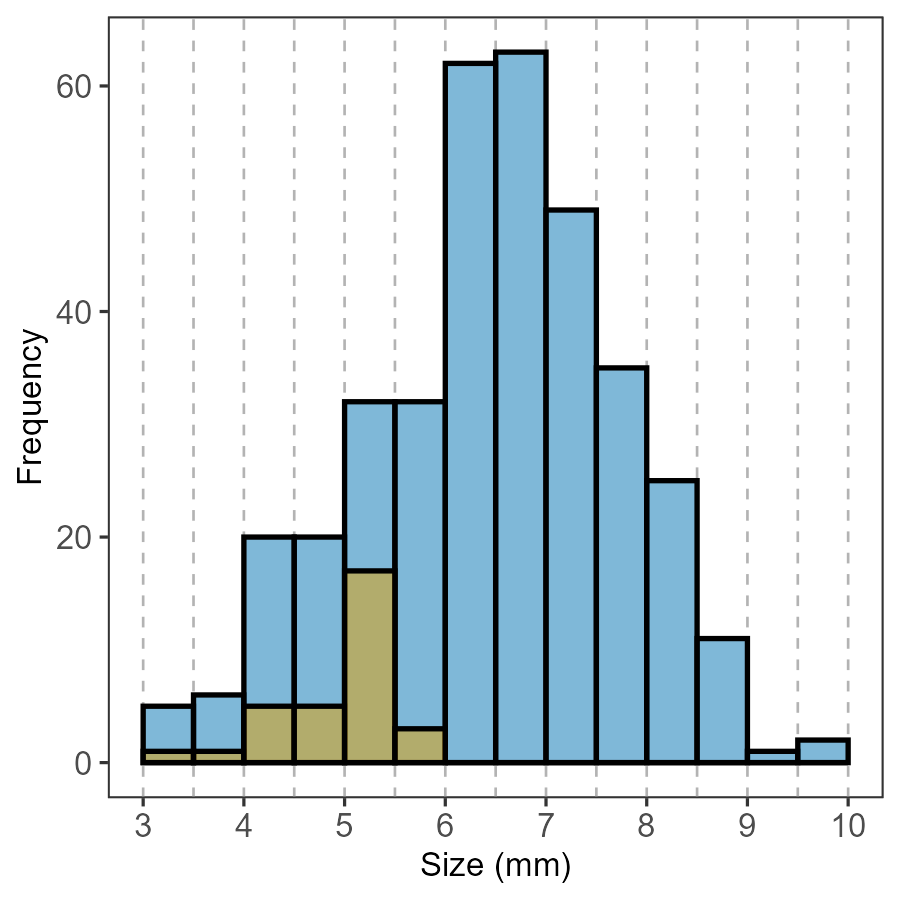

In [3653]:
# Convert images to base64
plot_lifestage_size <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_lifestage_size.png")

# Create the HTML (vertical display)
html_plot_lifestage_size <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    width: 48%; 
    height: auto; 
    display: block; 
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_lifestage_size, "' alt='Plot of Size by Lifestage'>
")

# Display the HTML
IRdisplay::display_html(html_plot_lifestage_size)

#### **Body Length Comparison (Morphs)**

In [3654]:
#--------------------------------------
summary_table <- data_pop_clean_morph %>%
  mutate(Morph2 = recode(Morph2,
                        "RB" = "Red-Beige",
                        "W" = "White",
                        "Bright" = "Bright",
                        "Other" = "Other")) %>%
  group_by(Morph2) %>%
  summarise(
    n = n(),
    Mean_Length = mean(Size, na.rm = TRUE),
    SD_Length = sd(Size, na.rm = TRUE),
    Min_Length = min(Size, na.rm = TRUE),
    SD_Length = max(Size, na.rm = TRUE)
  )


In [3655]:
html_table <- summary_table %>%
  kbl(caption = "Summary Statistics for Size based on Morph") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Morph2,n,Mean_Length,SD_Length,Min_Length
Bright,14,6.809571,9.769,4.139
Other,17,6.380588,8.137,4.329
Red-Beige,284,6.512388,9.612,3.017
White,48,5.996583,8.981,3.509


In [3656]:
# Kruskal-Wallis and Dunn's
kw_result <- kruskal.test(Size ~ Morph2, data = data_pop_clean_morph)
dunn_result <- dunnTest(Size ~ Morph2, data = data_pop_clean_morph, method = "bonferroni")

In [3657]:
# Format Kruskal-Wallis result as a one-row tibble
kw_table <- tibble(
  Test = "Kruskal-Wallis",
  Statistic = round(kw_result$statistic, 3),
  Df = kw_result$parameter,
  P_value = signif(kw_result$p.value, 3)
)

# Get Dunn’s test table
dunn_table <- dunn_result$res %>%
  rename(
    Comparison = Comparison,
    Z = Z,
    P_unadjusted = P.unadj,
    P_bonferroni = P.adj
  ) %>%
  mutate(across(where(is.numeric), round, 3))

In [3658]:

# Combine both: show Kruskal result above Dunn’s table
html_table <- list(
  kbl(kw_table, caption = "Kruskal-Wallis Test Summary") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria"),
  
  kbl(dunn_table, caption = "Dunn’s Post Hoc Test (Bonferroni-adjusted)") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria")
) %>%
  lapply(as.character) %>%
  paste(collapse = "<br><br>")  # add spacing between tables

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Test,Statistic,Df,P_value
Kruskal-Wallis,7.717,3,0.0522
Comparison,Z,P_unadjusted,P_bonferroni
Bright - Other,0.924,0.356,1.000
Bright - RB,0.568,0.570,1.000
Other - RB,-0.713,0.476,1.000
Bright - W,1.855,0.064,0.382
Other - W,0.815,0.415,1.000
RB - W,2.614,0.009,0.054


In [3659]:

# Relabel Morph levels directly
data_pop_clean_morph_renamed <- data_pop_clean_morph %>%
  mutate(Morph2 = recode(Morph2,
                        "RB" = "Red-Beige",
                        "W" = "White",
                        "Bright" = "Bright",
                        "Other" = "Other"))

data_pop_clean_morph_renamed$Morph2 <- factor(data_pop_clean_morph_renamed$Morph2,
    levels = c("Red-Beige", "White", "Bright", "Other")
)

plot_morph_size <- ggplot(data_pop_clean_morph_renamed, aes(x = Size, fill = Morph2)) +
  geom_histogram(binwidth = 0.5, boundary = 0, color = "black", alpha = 0.6) +
  facet_wrap(~ Morph2, nrow = 2) +
  scale_fill_manual(values = c("Red-Beige" = "indianred", "White" = "lightblue4", "Bright" = "darkorange", "Other" = "#009E73")) +
  scale_x_continuous(breaks = seq(floor(min(data_pop_clean_morph_renamed$Size)), 
                                  ceiling(max(data_pop_clean_morph_renamed$Size)), 
                                  by = 1)) +  
  labs(title = NULL, 
       x = "Size (mm)", 
       y = "Frequency") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major.x = element_line(color = "gray70", linetype = "dashed", linewidth = 0.3),
    panel.grid.major.y = element_blank(), 
    panel.grid.minor.x = element_line(color = "gray70", linetype = "dashed", linewidth = 0.3),
    panel.grid.minor.y = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_size.png", plot = plot_morph_size, width = 3, height = 3, units = "in", dpi = 300)


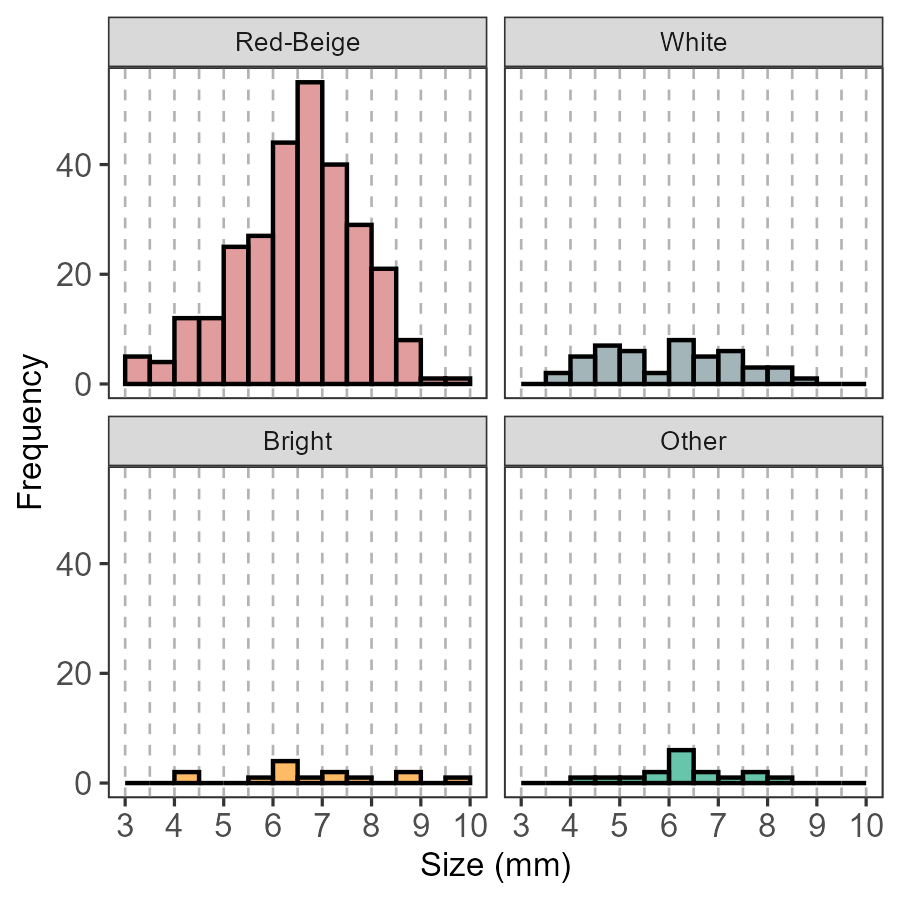

In [3660]:
# Convert images to base64
plot_morph_size <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_size.png")

# Create the HTML (vertical display)
html_plot_morph_size <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_morph_size, "' alt='Plot of Size by Morph'>
")

# Display the HTML
IRdisplay::display_html(html_plot_morph_size)

#### **Fecundity vs. Size (Females Only)**

In [3661]:
# Run Spearman correlations
cor_f_size <- cor.test(
  data_pop_clean_fecundity$Fecundity,
  data_pop_clean_fecundity$Size,
  method = "spearman"
)

cor_f_SA <- cor.test(
  data_pop_clean_fecundity$Fecundity,
  data_pop_clean_fecundity$Surface_area,
  method = "spearman"
)

Warning message in cor.test.default(data_pop_clean_fecundity$Fecundity, data_pop_clean_fecundity$Size, :
"Cannot compute exact p-value with ties"
Warning message in cor.test.default(data_pop_clean_fecundity$Fecundity, data_pop_clean_fecundity$Surface_area, :
"Cannot compute exact p-value with ties"


In [3662]:

# Format as a tibble
spearman_table <- tibble(
  Parameter = c("Body Length", "Surface Area"),
  Method = c(cor_f_size$method, cor_f_SA$method),
  Statistic = round(c(cor_f_size$statistic, cor_f_SA$statistic), 3),
  Rho = round(c(cor_f_size$estimate, cor_f_SA$estimate), 3),
  P_value = signif(c(cor_f_size$p.value, cor_f_SA$p.value), 4)
)


In [3663]:

# Create HTML table
html_table <- kbl(spearman_table, caption = "Spearman Correlation Between Fecundity and Female Size Parameters") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML
IRdisplay::display_html(html_table)

Parameter,Method,Statistic,Rho,P_value
Body Length,Spearman's rank correlation rho,157183.30,0.571,0.0e+00
Surface Area,Spearman's rank correlation rho,50526.25,0.470,7.5e-06


In [3664]:

# Scatter plots
# BODY LENGTH
plot_size_vs_fecundity <- ggplot(data_pop_clean_fecundity, aes(x = Size, y = Fecundity)) +
  geom_point(color = "black", fill = "#f38c8c", size = 2, shape = 21, stroke = 0.6) +  # Scatter points
  geom_smooth(method = "lm", color = "black", linetype = "dashed", se = FALSE) +
  scale_x_continuous(breaks = seq(floor(min(data_pop_clean_fecundity$Size)), 
                                  ceiling(max(data_pop_clean_fecundity$Size)), 
                                  by = 1)) +
  labs(title = NULL, 
       x = "Body Length (mm)", 
       y = "Number of eggs/female") +
  theme_bw(base_size = 8) +
  ggtitle("C") +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
    )

# SURFACE AREA
plot_SA_vs_fecundity <- ggplot(data_pop_clean_fecundity_SA, aes(x = Surface_area, y = Fecundity)) +
  geom_point(color = "black", fill = "#f38c8c", size = 2, shape = 21, stroke = 0.6) +  # Scatter points
  geom_smooth(method = "lm", color = "black", linetype = "dashed", se = FALSE) +
  scale_x_continuous(breaks = seq(floor(min(data_pop_clean_fecundity_SA$Surface_area)), 
                                  ceiling(max(data_pop_clean_fecundity_SA$Surface_area)), 
                                  by = 1)) +
  labs(title = NULL, 
       x = expression("Surface area" ~ (mm^2)), 
       y = "Number of eggs/female") +
  theme_bw(base_size = 8) +
  ggtitle("D") +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
    )



ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/fecundity_plot_size.png", plot = plot_size_vs_fecundity, width = 3, height = 3, units = "in", dpi = 300)

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/fecundity_plot_SA.png", plot = plot_SA_vs_fecundity, width = 3, height = 3, units = "in", dpi = 300)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'



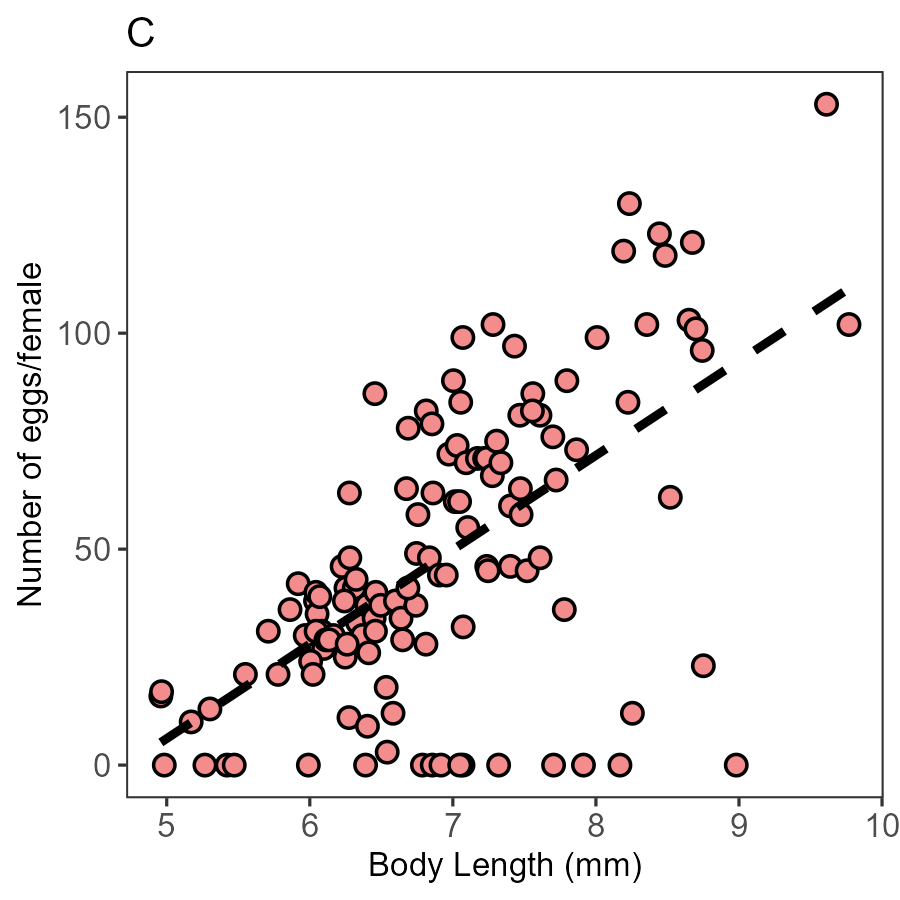
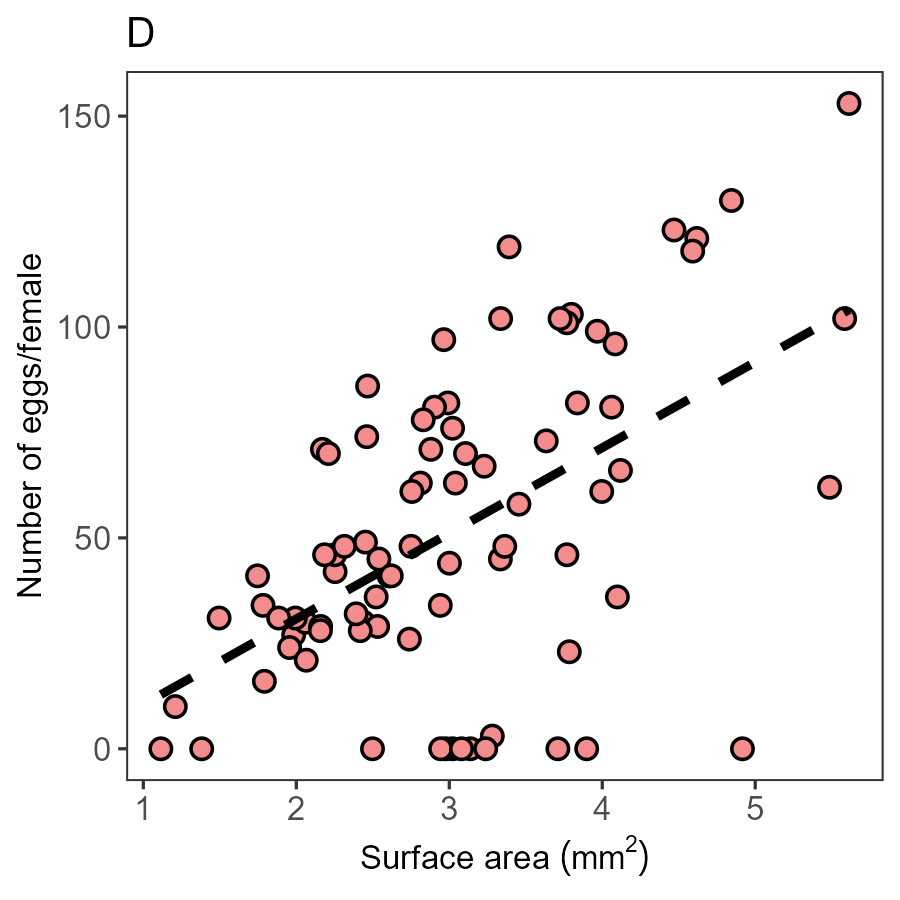

In [3665]:
# Convert images to base64
fecundity_plot_size <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/fecundity_plot_size.png")

fecundity_plot_SA <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/fecundity_plot_SA.png")


# Create the HTML (vertical display)
html_fecundity <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", fecundity_plot_size, "' alt='Plot of Fecundity by Size'>
<img src='", fecundity_plot_SA, "' alt='Plot of Fecundity by SA'>
")

# Display the HTML
IRdisplay::display_html(html_fecundity)

### 4. Count Data Investigations

#### **Total Counts by Sex and Morph**

First, we will just compare the total number of pods by sex and morph.

In [3666]:
# Count individuals by Sex
sex_counts <- data_pop_clean_morph %>%
  filter(!is.na(Sex)) %>%
  group_by(Sex) %>%
  summarise(Count = n(), .groups = "drop") %>%
  mutate(Sex = factor(Sex, levels = c("M", "F")))

# Use same color as final_plot_posteriors_m5_m6
pod_colors <- c("M" = "#999999", "F" = "#f38c8c")

# Matching bar plot style
plot_sex_abundance <- ggplot(sex_counts, aes(x = Sex, y = Count, fill = Sex, color = Sex)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9),
           width = 0.8, linewidth = 0.6) +
  scale_fill_manual(values = pod_colors) +
  scale_color_manual(values = pod_colors) +
  labs(
    x = "Sex",
    y = "Total count"
  ) +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    strip.text = element_text(face = "bold", size = 10),
    panel.spacing = unit(0.5, "lines"),
    legend.position = "none"
  )

# Save the plot
ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_abundance.png", plot = plot_sex_abundance, width = 3, height = 3, units = "in", dpi = 300)



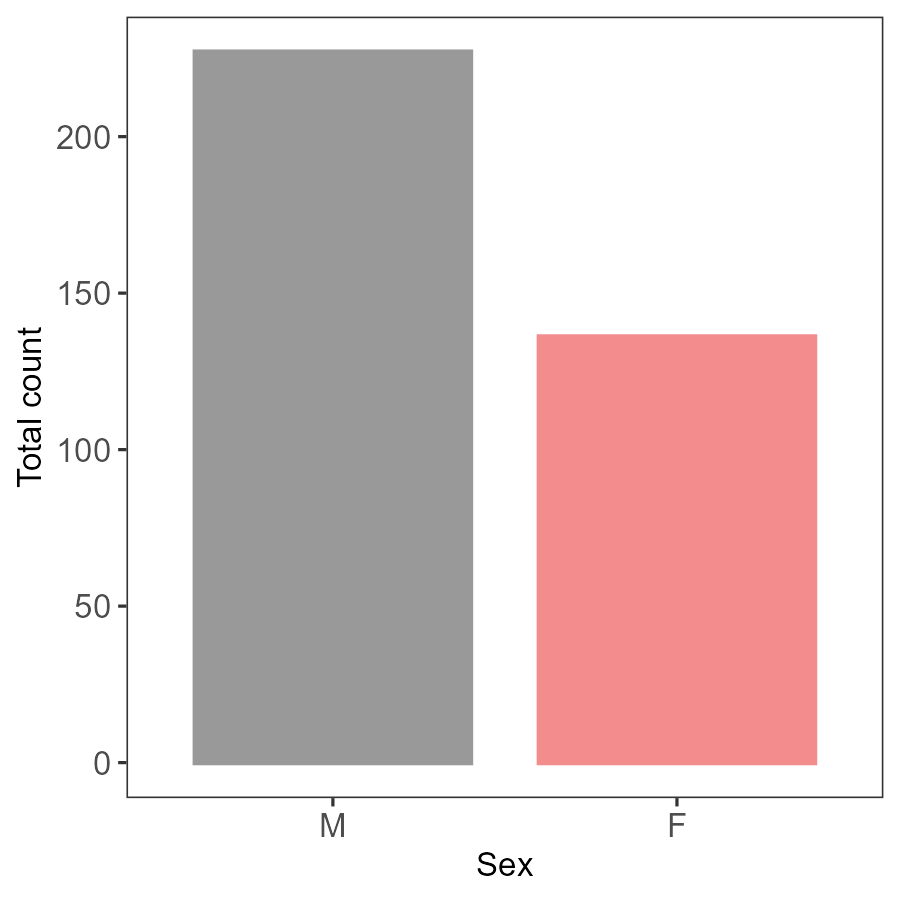

In [3667]:
# Convert images to base64
plot_sex_abundance <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_abundance.png")

# Create the HTML (vertical display)
html_plot_sex_count <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_sex_abundance, "' alt='Plot of Abundance by Sex'>
")

# Display the HTML
IRdisplay::display_html(html_plot_sex_count)

In [ ]:
# Count morphs within each group
morph_counts_nested <- data_pop_clean_morph %>%
  filter(!is.na(Morph), !is.na(Morph2)) %>%
  group_by(Morph2, Morph) %>%
  summarise(Count = n(), .groups = "drop")

# Recode and reorder Morph2
morph_counts_nested_clean <- morph_counts_nested %>%
  mutate(
    Morph2 = recode(Morph2,
      "Bright" = "Bright",
      "Other"  = "Other",
      "RB"     = "Red-Beige",
      "W"      = "White"
    ),
    Morph2 = factor(Morph2, levels = c("Red-Beige", "White", "Other", "Bright"))
  )

# Define manual fill (lighter) and outline (darker) colors
fill_colors <- c(
  "Red-Beige" = "#db8585",
  "White" = "#8fb1bc",
  "Bright" = "#faaa48",
  "Other" = "#28d3a5"
)

outline_colors <- c(
  "Red-Beige" = "indianred",
  "White" = "lightblue4",
  "Bright" = "darkorange",
  "Other" = "#009E73"
)

# Final plot, no need to mutate the data
plot_morph_abundance <- ggplot(morph_counts_nested_clean, aes(x = Morph2, y = Count)) +
  geom_bar(
    stat = "identity",
    aes(fill = Morph2, color = Morph2),
    position = position_dodge(width = 0.9),
    width = 0.8,
    linewidth = 0.6
  ) +
  scale_fill_manual(values = fill_colors) +
  scale_color_manual(values = outline_colors) +
  labs(
    x = "Morph",
    y = "Total count"
  ) +
  ggtitle("B") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    strip.text = element_text(face = "bold", size = 10),
    panel.spacing = unit(0.5, "lines"),
    legend.position = "none",
    plot.title = element_text(size = 14)
  )


ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_abundance.png", plot = plot_morph_abundance, width = 3, height = 3, units = "in", dpi = 300)


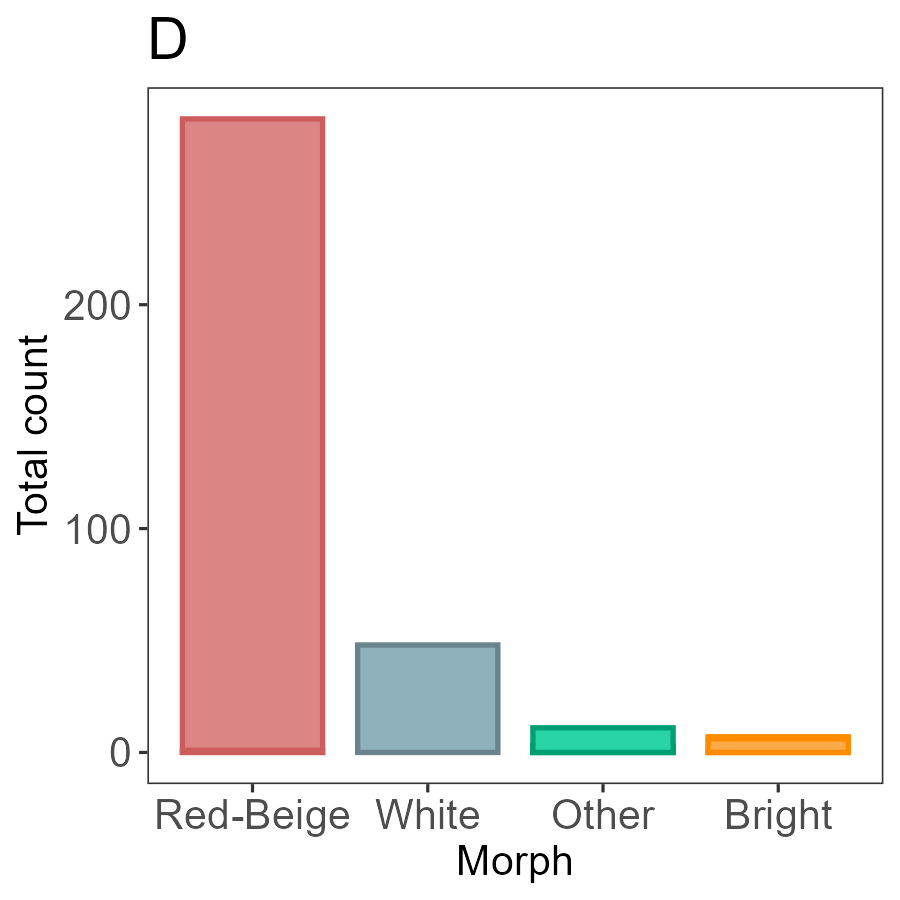

In [3669]:
# Convert images to base64
plot_morph_abundance <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_abundance.png")

# Create the HTML (vertical display)
html_plot_morph_count <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_morph_abundance, "' alt='Plot of Abundance by Morph'>
")

# Display the HTML
IRdisplay::display_html(html_plot_morph_count)

#### **Total Microhabitat Counts**

We will also look at the total number of microhabitat types across all quadrats. This isn't necessary - it's just for our reference.

In [3670]:
# Define custom order for microhabitat categories
custom_order <- c("Algae", "Sertulariidae_BRYO", "Sertulariidae", "Lafoea", "Hydrallmania","Other" )

# Count microhabitat and set the factor order
microhabitat_counts <- data_microhabitat_count_clean %>%
  group_by(Microhabitat, Group_2) %>%
  summarise(Count = n(), .groups = "drop") %>%
  mutate(Microhabitat = factor(Microhabitat, levels = custom_order))

# Fill and outline colors (manually defined to match nudie plot)
fill_colors <- c(
  "Algae" = "#c54d43",               # lighter orange
  "Sertulariidae_BRYO" = "#85c0df",  # lighter blue
  "Sertulariidae" = "#e78946",       # lighter brown
  "Lafoea" = "#e78946",
  "Hydrallmania" = "#e78946",
  "Other" = "#e78946"
)

outline_colors <- c(
  "Algae" = "#a6291e",               # dark red
  "Sertulariidae_BRYO" = "#0283d9",  # dark blue
  "Sertulariidae" = "#E66101",       # dark brown
  "Lafoea" = "#E66101",
  "Hydrallmania" = "#E66101",
  "Other" = "#E66101"
)

# Ensure Microhabitat is in correct order
microhabitat_counts <- data_microhabitat_count_clean %>%
  group_by(Microhabitat, Group_2) %>%
  summarise(Count = n(), .groups = "drop") %>%
  mutate(
    Microhabitat = factor(Microhabitat, levels = custom_order),
    fill_color = fill_colors[Microhabitat],
    outline_color = outline_colors[Microhabitat]
  )

# Final plot styled like nudie plot
plot_microhabitat_abundance <- ggplot(microhabitat_counts, aes(x = Microhabitat, y = Count)) +
  geom_bar(
    stat = "identity",
    aes(fill = fill_color, color = outline_color),
    width = 0.8,
    linewidth = 0.6,
    position = position_dodge(width = 0.9)
  ) +
  geom_text(
    aes(label = Group_2, y = Count + 4),
    size = 2.5,
    fontface = "bold",
    color = "black"
  ) +
  scale_fill_identity() +
  scale_color_identity() +
  scale_x_discrete(labels = microhabitat_labels) +
  labs(
    x = "Microhabitat",
    y = "Total count"
  ) +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    strip.text = element_text(face = "bold", size = 10),
    panel.spacing = unit(0.5, "lines"),
    legend.position = "none"
  )


# Save the plot
ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_microhabitat_abundance.png",
       plot = plot_microhabitat_abundance, width = 3, height = 3, units = "in", dpi = 300)



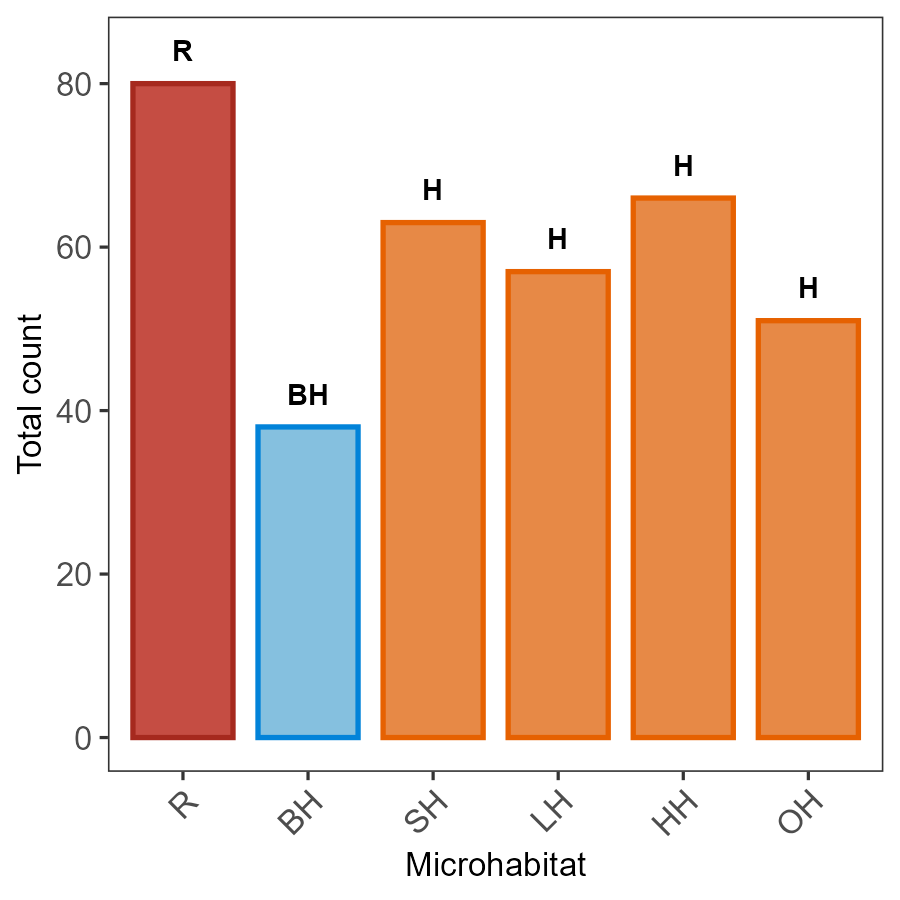

In [3671]:
# Convert images to base64
plot_microhabitat_abundance <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_microhabitat_abundance.png")

# Create the HTML (vertical display)
html_plot_microhabitat_count <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_microhabitat_abundance, "' alt='Plot of Abundance by Microhabitat'>
")

# Display the HTML
IRdisplay::display_html(html_plot_microhabitat_count)

In [3672]:
# Define custom order for microhabitat categories
custom_order <- c("Algae", "Sertulariidae_BRYO", "Sertulariidae", "Lafoea", "Hydrallmania", "Other")

# Summarize counts by Site and Microhabitat
microhabitat_counts_by_site <- data_microhabitat_count_clean %>%
  group_by(Site, Microhabitat, Group_2) %>%
  summarise(Count = n(), .groups = "drop") %>%
  mutate(Microhabitat = factor(Microhabitat, levels = custom_order))

# Define axis labels
microhabitat_labels <- c(
  "Algae" = "R",
  "Sertulariidae_BRYO" = "BH",
  "Sertulariidae" = "SH",
  "Lafoea" = "LH",
  "Hydrallmania" = "HH",
  "Other" = "OH"
)

# Define custom colors
microhabitat_colors <- c(
  "Sertulariidae" = "#E66101",
  "Sertulariidae_BRYO" = "#0283d9",
  "Other" = "#E66101",
  "Hydrallmania" = "#E66101",
  "Algae" = "#a6291e",
  "Lafoea" = "#E66101"
)

# Generate faceted plot
plot_microhabitat_by_site <- ggplot(microhabitat_counts_by_site, aes(x = Microhabitat, y = Count, fill = Microhabitat)) +
  geom_bar(stat = "identity", color = "black", width = 0.8) +
  geom_text(
    aes(label = Group_2, y = Count + 3),
    size = 2.5,
    fontface = "bold",
    color = "black"
  ) +
  scale_fill_manual(values = microhabitat_colors) +
  scale_x_discrete(labels = microhabitat_labels) +
  labs(
    x = "Microhabitat",
    y = "Total count",
    fill = "Microhabitat"
  ) +
  facet_wrap(~ Site, scales = "free_y") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid = element_blank(),
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    strip.text = element_text(face = "bold", size = 8),
    legend.position = "none"
  )

# Save the plot
ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_microhabitat_by_site.png",
       plot = plot_microhabitat_by_site, width = 6, height = 4, units = "in", dpi = 300)



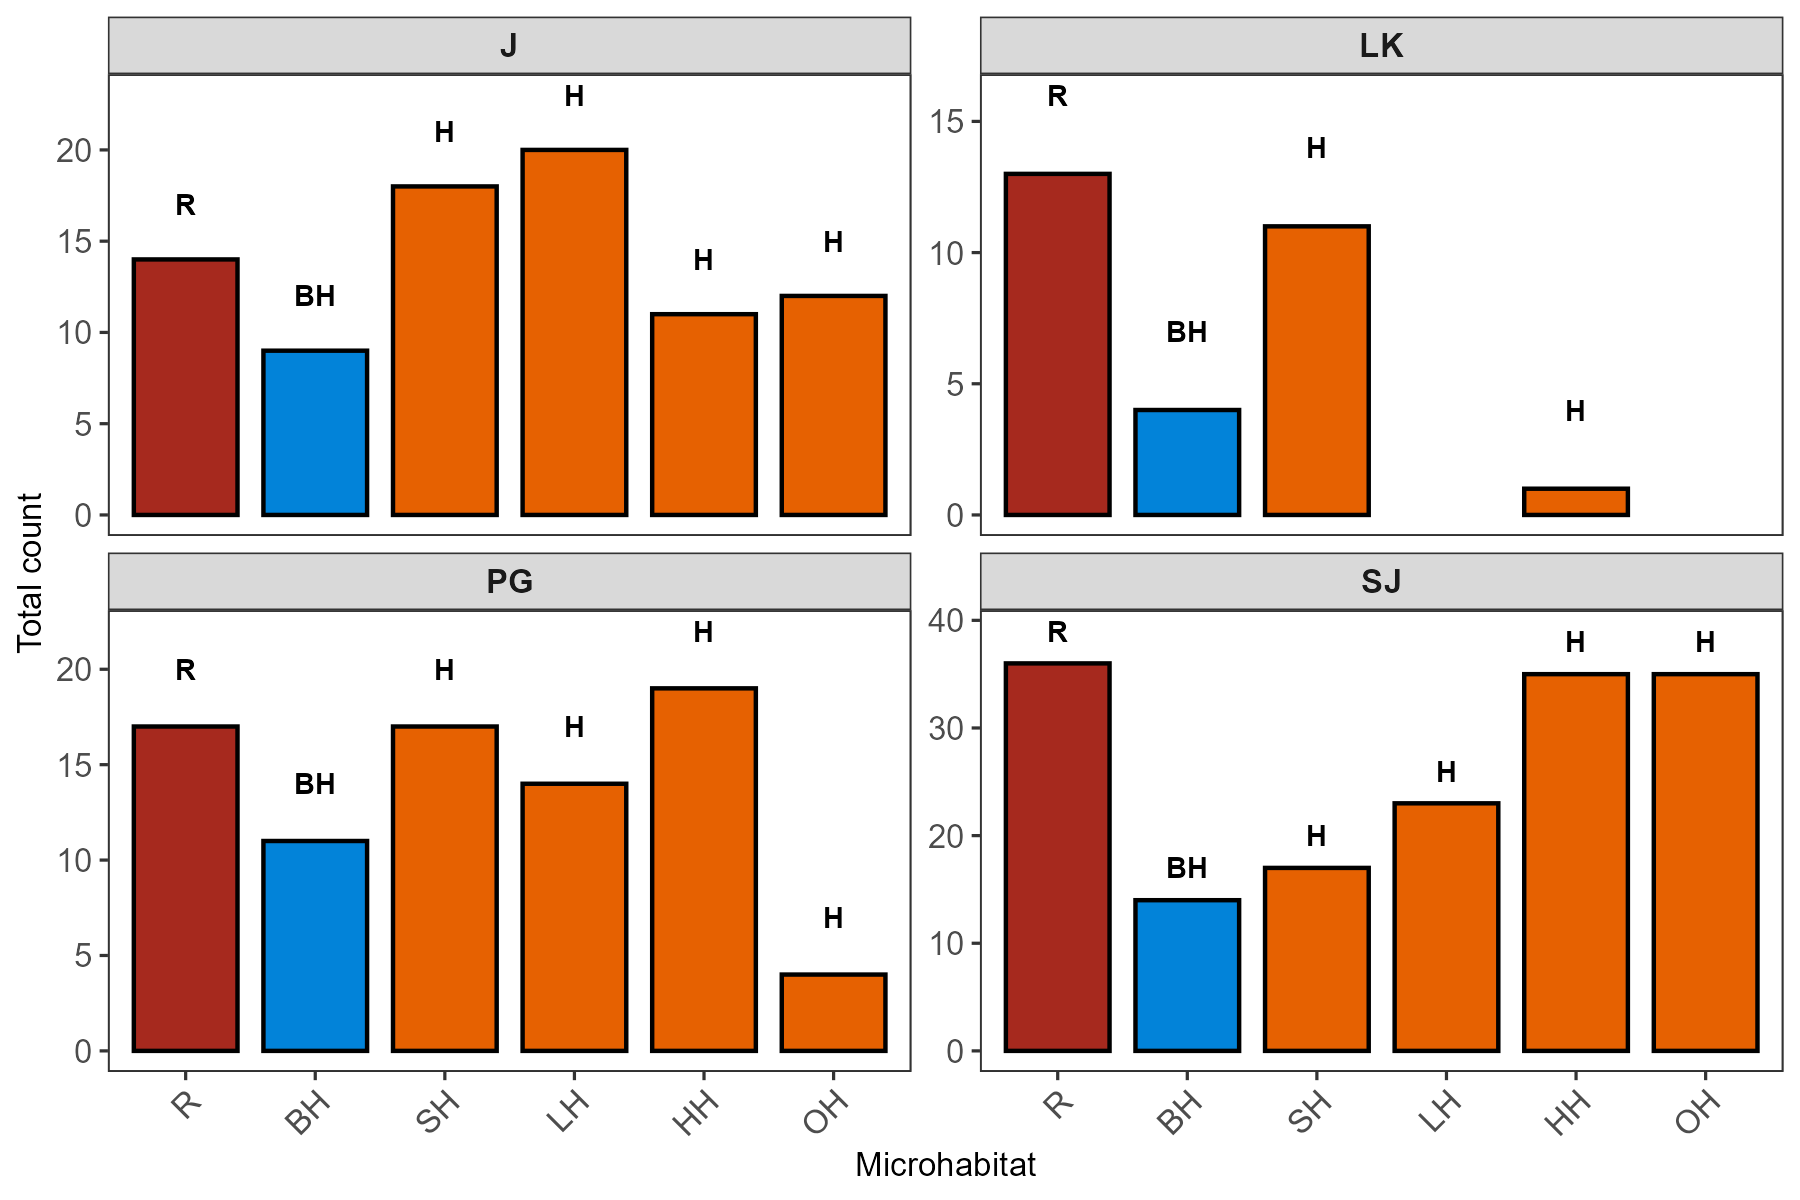

In [3673]:

# Convert images to base64
plot_microhabitat_by_site <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_microhabitat_by_site.png")

# Create the HTML (vertical display)
html_plot_microhabitat_by_site <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_microhabitat_by_site, "' alt='Plot of Abundance by Microhabitat by Site'>
")

# Display the HTML
IRdisplay::display_html(html_plot_microhabitat_by_site)

#### **Mean Pod Counts**

Next, we analyze overall Pod counts and the distribution of morphs and nudibranchs across sites and microhabitats. We will use Kruskal-Wallis and Dunn's post-hoc tests for comparing raw counts, and chi-square tests for comparing ratios.

In [3674]:
#--------------------------------------
pod_counts_combined <- data_count_clean %>%
  group_by(Site) %>%
  summarise(
    n = n(),
    Mean_Count = mean(Count_Pod, na.rm = TRUE),
    SD_Count = sd(Count_Pod, na.rm = TRUE),
    .groups = "drop"
  )

In [3675]:

html_table <- pod_counts_combined %>%
  kbl(caption = "Summary Statistics for Pod Count by Site") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Site,n,Mean_Count,SD_Count
J,84,0.4761905,1.3396294
LK,29,0.6551724,0.9737946
PG,82,0.5609756,1.1663763
SJ,160,0.2312500,0.8258548


In [3676]:
# Kruskal-Wallis and Dunn's
kw_result <- kruskal.test(Count_Pod ~ Site, data = data_count_clean)
dunn_result <- dunnTest(Count_Pod ~ Site, data = data_count_clean, method = "bonferroni")

In [3677]:

# Format Kruskal-Wallis result as a one-row tibble
kw_table <- tibble(
  Test = "Kruskal-Wallis",
  Statistic = round(kw_result$statistic, 3),
  Df = kw_result$parameter,
  P_value = signif(kw_result$p.value, 3)
)

# Get Dunn’s test table
dunn_table <- dunn_result$res %>%
  rename(
    Comparison = Comparison,
    Z = Z,
    P_unadjusted = P.unadj,
    P_bonferroni = P.adj
  ) %>%
  mutate(across(where(is.numeric), round, 3))

In [3678]:

# Combine both: show Kruskal result above Dunn’s table
html_table <- list(
  kbl(kw_table, caption = "Kruskal-Wallis Test Summary") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria"),
  
  kbl(dunn_table, caption = "Dunn’s Post Hoc Test (Bonferroni-adjusted)") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria")
) %>%
  lapply(as.character) %>%
  paste(collapse = "<br><br>")  # add spacing between tables

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Test,Statistic,Df,P_value
Kruskal-Wallis,22.311,3,5.62e-05
Comparison,Z,P_unadjusted,P_bonferroni
J - LK,-2.011,0.044,0.266
J - PG,-1.956,0.050,0.303
LK - PG,0.599,0.549,1.000
J - SJ,1.791,0.073,0.440
LK - SJ,3.341,0.001,0.005
PG - SJ,4.013,0.000,0.000


In [3679]:
# Cleaned and corrected data prep
pod_counts_combined_clean <- pod_counts_combined %>%
  mutate(
    Site = recode(Site,
                    "J" = "J",
                    "PG" = "PG",
                    "SJ" = "SJ",
                    "LK" = "LK"),
    Site = factor(Site, levels = c("LK", "PG", "J", "SJ"))
  )

plot_count_site <- ggplot(pod_counts_combined_clean, aes(x = Site, y = Mean_Count, fill = Site)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", width = 0.8) +
  geom_errorbar(aes(ymin = Mean_Count, ymax = Mean_Count + SD_Count), 
                width = 0.3, position = position_dodge(width = 0.9)) +
  scale_fill_manual(values = rep("black", length(unique(pod_counts_combined_clean$Site)))) +
  labs(
    title = NULL,
    x = "Site",
    y = expression("Mean number of " * italic("P. cristatus")),
    fill = "Site"
  ) +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_count_site.png", plot = plot_count_site, width = 3, height = 3, units = "in", dpi = 300)


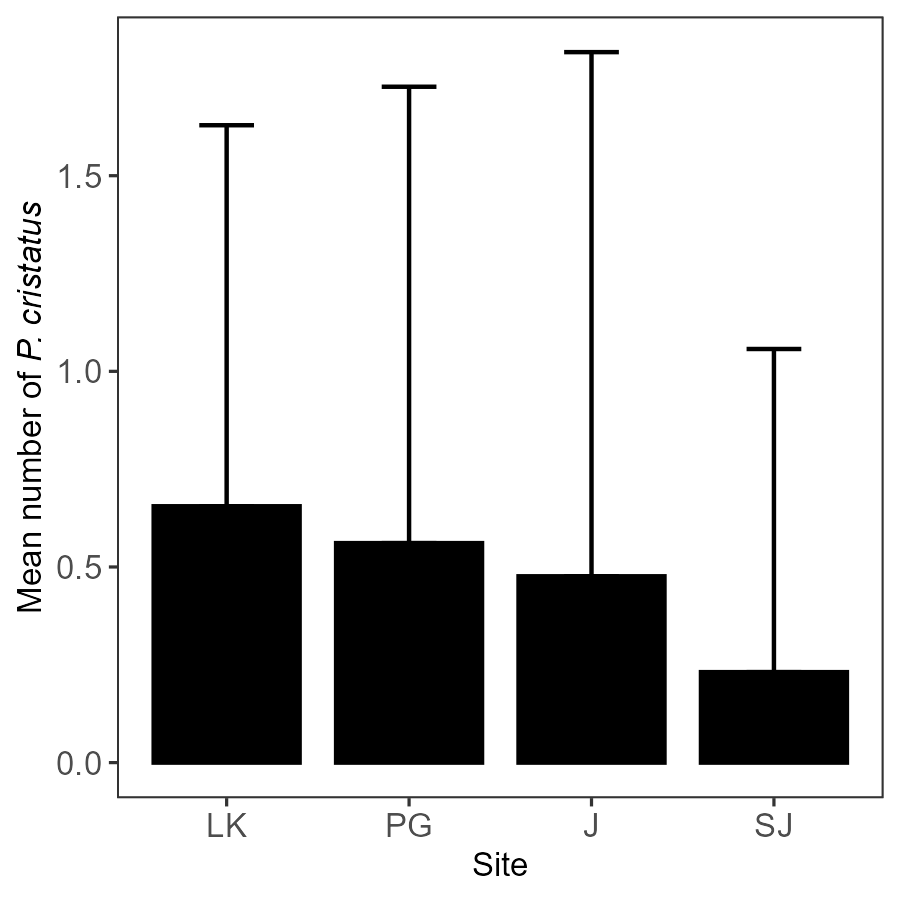

In [3680]:
# Convert images to base64
plot_count_site <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_count_site.png")

# Create the HTML (vertical display)
html_plot_count_site <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_count_site, "' alt='Plot of Count by Site'>
")

# Display the HTML
IRdisplay::display_html(html_plot_count_site)

#### **Sex Ratio by Site**

In [3681]:
#--------------------------------------
# Compute sex proportions per quadrat within each Site
sex_prop_long <- data_count_clean %>%
  mutate(
    Total = Count_Pod_M + Count_Pod_F
  ) %>%
  filter(Total > 0) %>%
  mutate(
    Male     = Count_Pod_M / Total,
    Female   = Count_Pod_F / Total,
  ) %>%
  pivot_longer(
    cols = c(Male, Female),
    names_to = "Sex",
    values_to = "Proportion"
  )

# Summarize mean ± SD/SE per sex per site
sex_summary <- sex_prop_long %>%
  group_by(Site, Sex) %>%
  summarise(
    Mean = mean(Proportion, na.rm = TRUE),
    SD = sd(Proportion, na.rm = TRUE),
    N = n(),
    SE = SD / sqrt(N),
    .groups = "drop"
  )


In [3682]:
html_table <- sex_summary %>%
  kbl(caption = "Summary Statistics for Sex Proportions") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)

Site,Sex,Mean,SD,N,SE
J,Female,0.4861111,0.3792455,16,0.0948114
J,Male,0.5138889,0.3792455,16,0.0948114
LK,Female,0.0740741,0.1469862,9,0.0489954
LK,Male,0.9259259,0.1469862,9,0.0489954
PG,Female,0.4200000,0.4500000,25,0.0900000
PG,Male,0.5800000,0.4500000,25,0.0900000
SJ,Female,0.5044444,0.4066641,15,0.1050002
SJ,Male,0.4955556,0.4066641,15,0.1050002


In [3683]:

# Chi-squared test on sex proportions per site
sex_ratio_table <- data_count_clean %>%
  group_by(Site) %>%
  summarise(
    Male = sum(Count_Pod_M, na.rm = TRUE),
    Female = sum(Count_Pod_F, na.rm = TRUE),
    .groups = "drop"
  )

In [3684]:

# Create contingency matrix and run chi-square test
sex_matrix <- sex_ratio_table %>%
  column_to_rownames("Site") %>%
  as.matrix()

sex_chi_test <- chisq.test(sex_matrix)

# Format chi-square result as a tibble
chi_table <- tibble(
  Test = "Chi-squared Test",
  X_squared = round(sex_chi_test$statistic, 3),
  Df = sex_chi_test$parameter,
  P_value = signif(sex_chi_test$p.value, 4)
)


In [3685]:
# Create and display the HTML table
html_table <- kbl(chi_table, caption = "Chi-squared Test of Sex Ratio by Site") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Test,X_squared,Df,P_value
Chi-squared Test,6.4,3,0.0937


In [3686]:

# Colors by sex
pod_colors <- c("Male" = "#999999", "Female" = "#f38c8c")

# Cleaned and corrected data prep
sex_summary_clean <- sex_summary %>%
  filter(Sex %in% c("Male", "Female")) %>%  # ensure only valid morphs
  mutate(
    Sex= factor(Sex, levels = c("Male", "Female")),
    Site = recode(Site,
                    "J" = "J",
                    "PG" = "PG",
                    "SJ" = "SJ",
                    "LK" = "LK"),
    Site = factor(Site, levels = c("LK", "J", "PG", "SJ"))
  )

# Plot
plot_sex_site <- ggplot(sex_summary_clean, aes(x = Site, y = Mean, fill = Sex)) +
  geom_col(position = position_dodge(width = 0.7), width = 0.7, color = "black") +
  geom_errorbar(aes(ymin = Mean, ymax = Mean + SD),
                width = 0.3, position = position_dodge(width = 0.8)) +
  scale_fill_manual(values = pod_colors) +
  labs(
    x = "Site",
    y = expression("Mean Proportion of " * italic("P. cristatus")),
    fill = "Sex"
  ) +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_site.png", plot = plot_sex_site, width = 3, height = 3, units = "in", dpi = 300)

  


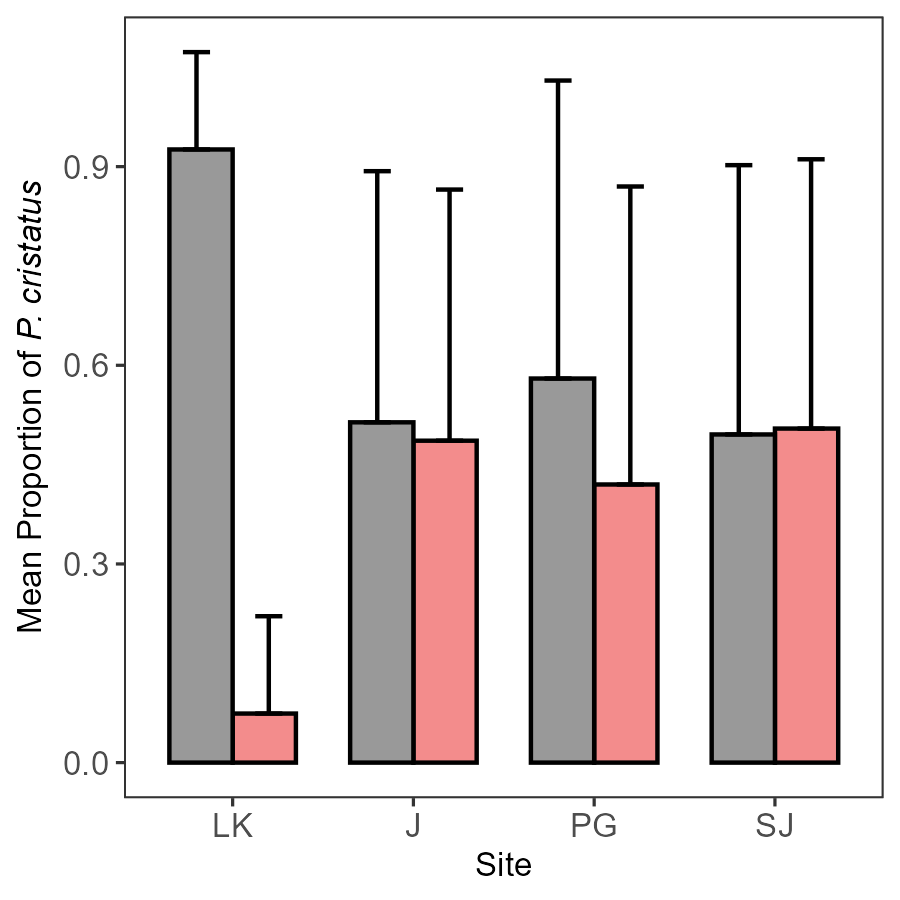

In [3687]:
# Convert images to base64
plot_sex_site <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_site.png")

# Create the HTML (vertical display)
html_plot_sex_site <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_sex_site, "' alt='Plot of Sex Ratio by Site'>
")

# Display the HTML
IRdisplay::display_html(html_plot_sex_site)

#### **Morph Ratio by Site**

In [3688]:
#--------------------------------------
# Compute morph proportions per quadrat within each Site
morph_prop_long <- data_count_clean %>%
  mutate(
    Total = Count_Pod_RB + Count_Pod_W + Count_Pod_Bright + Count_Pod_Other
  ) %>%
  filter(Total > 0) %>%
  mutate(
    Red_Beige     = Count_Pod_RB / Total,
    White   = Count_Pod_W / Total,
    Bright     = Count_Pod_Bright / Total,
    Other   = Count_Pod_Other / Total,
  ) %>%
  pivot_longer(
    cols = c(Red_Beige, White, Bright, Other),
    names_to = "Morph2",
    values_to = "Proportion"
  )

# Summarize mean ± SD/SE per morph per site
morph_summary <- morph_prop_long %>%
  group_by(Site, Morph2) %>%
  summarise(
    Mean = mean(Proportion, na.rm = TRUE),
    SD = sd(Proportion, na.rm = TRUE),
    N = n(),
    SE = SD / sqrt(N),
    .groups = "drop"
  )


In [3689]:

html_table <- morph_summary %>%
  kbl(caption = "Summary Statistics for Morph Proportions") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Site,Morph2,Mean,SD,N,SE
J,Bright,0.0947712,0.2633508,17,0.0638720
J,Other,0.0196078,0.0808452,17,0.0196078
J,Red_Beige,0.7189542,0.3404736,17,0.0825770
J,White,0.1666667,0.2204793,17,0.0534741
LK,Bright,0.0000000,0.0000000,11,0.0000000
LK,Other,0.0454545,0.1507557,11,0.0454545
LK,Red_Beige,0.9545455,0.1507557,11,0.0454545
LK,White,0.0000000,0.0000000,11,0.0000000
PG,Bright,0.0178571,0.0944911,28,0.0178571
PG,Other,0.0937500,0.2734912,28,0.0516850


In [3690]:

# Chi-squared test on morph proportions per site
morph_ratio_table <- data_count_clean %>%
  group_by(Site) %>%
  summarise(
    Red_Beige = sum(Count_Pod_RB, na.rm = TRUE),
    White = sum(Count_Pod_W, na.rm = TRUE),
    Bright = sum(Count_Pod_Bright, na.rm = TRUE),
    Other = sum(Count_Pod_Other, na.rm = TRUE),
    .groups = "drop"
  )

# Create contingency matrix and run chi-square test
morph_matrix <- morph_ratio_table %>%
  column_to_rownames("Site") %>%
  as.matrix()

morph_chi_test <- chisq.test(morph_matrix)

Warning message in chisq.test(morph_matrix):
"Chi-squared approximation may be incorrect"


In [3691]:

# Format chi-square result as a tibble
chi_table <- tibble(
  Test = "Chi-squared Test",
  X_squared = round(morph_chi_test$statistic, 3),
  Df = morph_chi_test$parameter,
  P_value = signif(morph_chi_test$p.value, 4)
)

In [3692]:

# Create and display the HTML table
html_table <- kbl(chi_table, caption = "Chi-squared Test of Morph Ratio by Site") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Test,X_squared,Df,P_value
Chi-squared Test,13.551,9,0.1392


In [3693]:

pod_colors <- c("Red_Beige" = "indianred", "White" = "lightblue4", "Bright" = "darkorange", "Other" = "#009E73")

# Cleaned and corrected data prep
morph_summary_clean <- morph_summary %>%
  filter(Morph2 %in% c("Red_Beige", "White", "Bright", "Other")) %>%  # ensure only valid morphs
  mutate(
    Morph2 = factor(Morph2, levels = c("Red_Beige", "White", "Bright", "Other")),
    Site = recode(Site,
                    "J" = "J",
                    "PG" = "PG",
                    "SJ" = "SJ",
                    "LK" = "LK"),
    Site = factor(Site, levels = c("LK", "J", "PG", "SJ"))
  )

# Plot
plot_morph_site <- ggplot(morph_summary_clean, aes(x = Site, y = Mean, fill = Morph2)) +
  geom_col(position = position_dodge(width = 0.7), width = 0.7, color = "black") +
  geom_errorbar(aes(ymin = Mean, ymax = Mean + SD),
                width = 0.3, position = position_dodge(width = 0.8)) +
  scale_fill_manual(values = pod_colors) +
  labs(
    x = "Site",
    y = expression("Mean Proportion of " * italic("P. cristatus")),
    fill = "Sex"
  ) +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_site.png", plot = plot_morph_site, width = 3, height = 3, units = "in", dpi = 300)


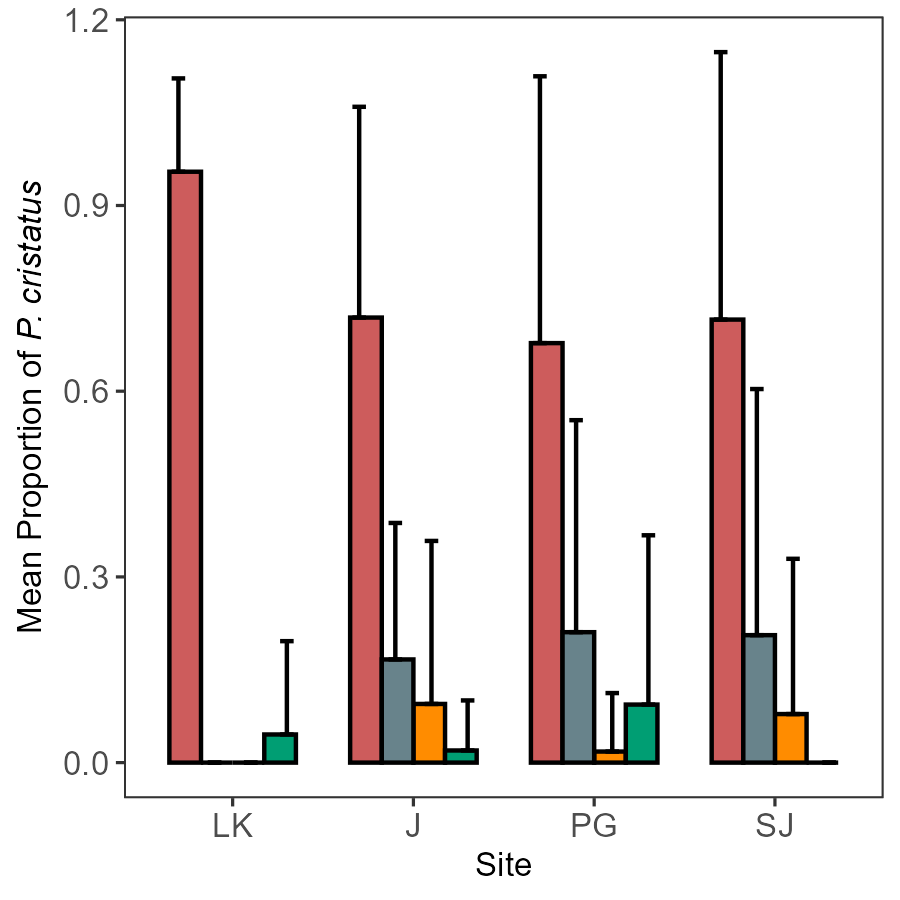

In [3694]:
# Convert images to base64
plot_morph_site <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_site.png")

# Create the HTML (vertical display)
html_plot_morph_site <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_morph_site, "' alt='Plot of Morph Ratio by Site'>
")

# Display the HTML
IRdisplay::display_html(html_plot_morph_site)

#### **Aeolid Nudibranch Counts by Site**

In [3695]:
#--------------------------------------
nudie_counts_combined <- data_count_clean %>%
  group_by(Site) %>%
  summarise(
    n = n(),
    Mean_Count = mean(Count_Nudie_Aeolid, na.rm = TRUE),
    SD_Count = sd(Count_Nudie_Aeolid, na.rm = TRUE),
    .groups = "drop"
  )

In [3696]:

html_table <- nudie_counts_combined %>%
  kbl(caption = "Summary Statistics for Aeolid Nudibranch Count by Site") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)

Site,n,Mean_Count,SD_Count
J,84,0.3214286,0.6615191
LK,29,0.0344828,0.1856953
PG,82,2.9024390,9.9438048
SJ,160,0.5625000,2.8564998


In [3697]:

# Kruskal-Wallis and Dunn's
kw_result <- kruskal.test(Count_Nudie_Aeolid ~ Site, data = data_count_clean)
dunn_result <- dunnTest(Count_Nudie_Aeolid ~ Site, data = data_count_clean, method = "bonferroni")

# Format Kruskal-Wallis result as a one-row tibble
kw_table <- tibble(
  Test = "Kruskal-Wallis",
  Statistic = round(kw_result$statistic, 3),
  Df = kw_result$parameter,
  P_value = signif(kw_result$p.value, 3)
)

# Get Dunn’s test table
dunn_table <- dunn_result$res %>%
  rename(
    Comparison = Comparison,
    Z = Z,
    P_unadjusted = P.unadj,
    P_bonferroni = P.adj
  ) %>%
  mutate(across(where(is.numeric), round, 3))


In [3698]:

# Combine both: show Kruskal result above Dunn’s table
html_table <- list(
  kbl(kw_table, caption = "Kruskal-Wallis Test Summary") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria"),
  
  kbl(dunn_table, caption = "Dunn’s Post Hoc Test (Bonferroni-adjusted)") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria")
) %>%
  lapply(as.character) %>%
  paste(collapse = "<br><br>")  # add spacing between tables

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Test,Statistic,Df,P_value
Kruskal-Wallis,11.74,3,0.00833
Comparison,Z,P_unadjusted,P_bonferroni
J - LK,2.128,0.033,0.200
J - PG,-1.421,0.155,0.932
LK - PG,-3.143,0.002,0.010
J - SJ,0.872,0.383,1.000
LK - SJ,-1.689,0.091,0.547
PG - SJ,2.489,0.013,0.077


In [3699]:
# Cleaned and corrected data prep
nudie_counts_combined_clean <- nudie_counts_combined %>%
  mutate(
    Site = recode(Site,
                    "J" = "J",
                    "PG" = "PG",
                    "SJ" = "SJ",
                    "LK" = "LK"),
    Site = factor(Site, levels = c("LK", "J", "PG", "SJ"))
  )

plot_nudie_site <- ggplot(nudie_counts_combined_clean, aes(x = Site, y = Mean_Count, fill = Site)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", width = 0.8) +
  geom_errorbar(aes(ymin = Mean_Count, ymax = Mean_Count + SD_Count), 
                width = 0.3, position = position_dodge(width = 0.9)) +
  scale_fill_manual(values = rep("darkgrey", length(unique(nudie_counts_combined_clean$Site)))) +
  labs(title = NULL, 
       x = "Site", 
       y = "Mean number of aeolid nudibranchs", 
       fill = "Site") +
  theme_bw(base_size = 8) +
  ggtitle("C") +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_site.png", plot = plot_nudie_site, width = 3, height = 3, units = "in", dpi = 300)



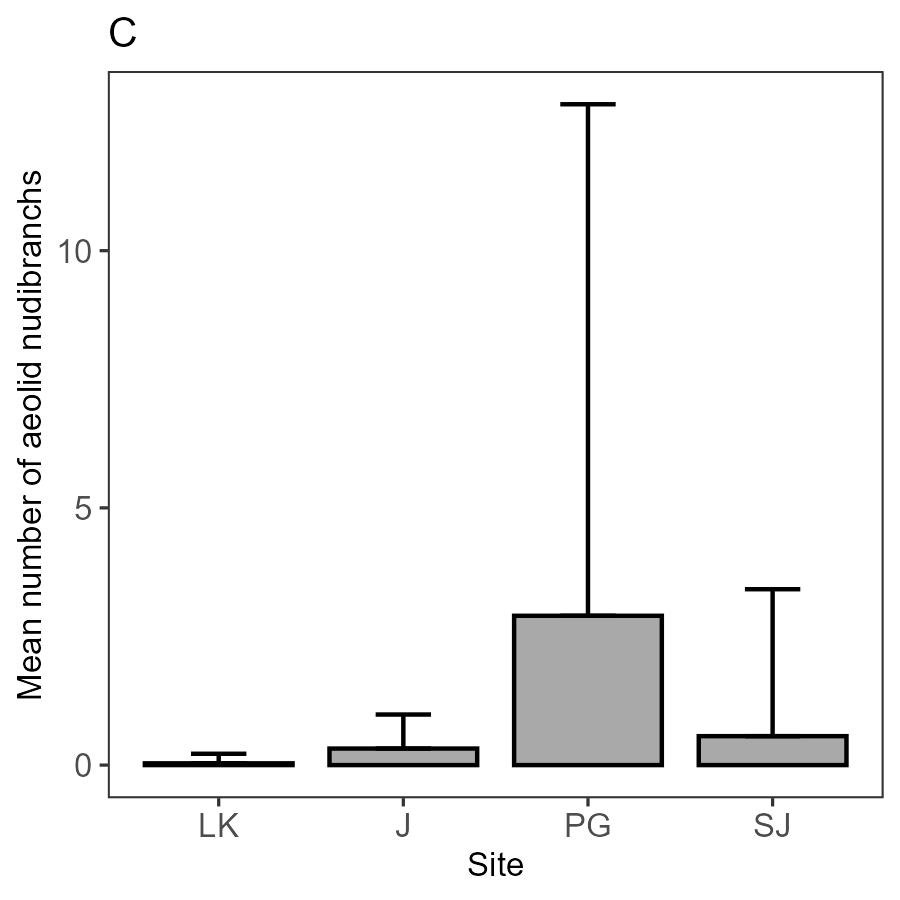

In [3700]:
# Convert images to base64
plot_nudie_site <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_site.png")

# Create the HTML (vertical display)
html_plot_nudie_site <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_nudie_site, "' alt='Plot of Nudibranch count by Site'>
")

# Display the HTML
IRdisplay::display_html(html_plot_nudie_site)

In [3701]:
# Extra visualization of Aeolid nudibranchs by type (done on log scale to see data better)
#--------------------------------------

nudie_counts_combined <- data_count_clean %>%
  group_by(Site) %>%
  summarise(
    Mean_Nudie_Dendronotus_Count = mean(Count_Nudie_Dendronotus, na.rm = TRUE),
    SD_Nudie_Dendronotus_Count = sd(Count_Nudie_Dendronotus, na.rm = TRUE),
    Mean_Nudie_Doto_Count = mean(Count_Nudie_Doto, na.rm = TRUE),
    SD_Nudie_Doto_Count = sd(Count_Nudie_Doto, na.rm = TRUE),
    Mean_Nudie_Aeolid_Other_Count = mean(Count_Nudie_Aeolid_Other, na.rm = TRUE),
    SD_Nudie_Aeolid_Other_Count = sd(Count_Nudie_Aeolid_Other, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  pivot_longer(cols = c(Mean_Nudie_Dendronotus_Count, Mean_Nudie_Doto_Count, Mean_Nudie_Aeolid_Other_Count), names_to = "Taxon", values_to = "Mean_Count") %>%
  pivot_longer(cols = c(SD_Nudie_Dendronotus_Count, SD_Nudie_Doto_Count, SD_Nudie_Aeolid_Other_Count), names_to = "SD_Taxon", values_to = "SD_Count") %>%
  filter(Taxon == gsub("SD_", "Mean_", SD_Taxon))

nudie_ratio_table <- data_count_clean %>%
  group_by(Site) %>%
  summarise(
    Dendronotus = sum(Count_Nudie_Dendronotus, na.rm = TRUE),
    Doto = sum(Count_Nudie_Doto, na.rm = TRUE),
    Aeolid_Other = sum(Count_Nudie_Aeolid_Other, na.rm = TRUE)
  )


In [3702]:
html_table <- nudie_ratio_table %>%
  kbl(caption = "Summary Statistics for Nudibranch Count by Site") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)

Site,Dendronotus,Doto,Aeolid_Other
J,7,10,10
LK,0,0,1
PG,6,230,2
SJ,13,69,8


In [3703]:


nudie_colors <- c("Mean_Nudie_Dendronotus_Count" = "#b26f1e", "Mean_Nudie_Doto_Count" = "#000000", "Mean_Nudie_Aeolid_Other_Count" = "#681fc2")

nudie_counts_combined$Taxon <- factor(nudie_counts_combined$Taxon,
                                    levels = c("Mean_Nudie_Dendronotus_Count", "Mean_Nudie_Doto_Count", "Mean_Nudie_Aeolid_Other_Count"))

# Cleaned and corrected data prep
nudie_counts_combined_clean <- nudie_counts_combined %>%
  mutate(
    Site = recode(Site,
                    "J" = "J",
                    "PG" = "PG",
                    "SJ" = "SJ",
                    "LK" = "LK"),
    Site = factor(Site, levels = c("LK", "J", "PG", "SJ"))
  )

plot_nudie_types_site <- ggplot(nudie_counts_combined_clean, aes(x = Site, y = log(1 + Mean_Count), fill = Taxon)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black") +
  geom_errorbar(aes(ymin = log(1 + Mean_Count), ymax = log(1 + Mean_Count + SD_Count)), width = 0.3, position = position_dodge(width = 0.9)) +
  scale_fill_manual(values = nudie_colors, labels = c("Mean_Nudie_Dendronotus_Count" = "Dendronotus", "Mean_Nudie_Doto_Count" = "Doto", "Mean_Nudie_Aeolid_Other_Count" = "Other Aeolid")) +
  labs(title = NULL, 
       x = "Site", 
       y = "log(1 + Mean number of nudibranchs)", 
       fill = "Taxon") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = c(0.2, 0.8),
    legend.text = element_text(size = 8),
    legend.key.size = unit(0.2, "in")
  )


ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_types_site.png", plot = plot_nudie_types_site, width = 3, height = 3, units = "in", dpi = 300)



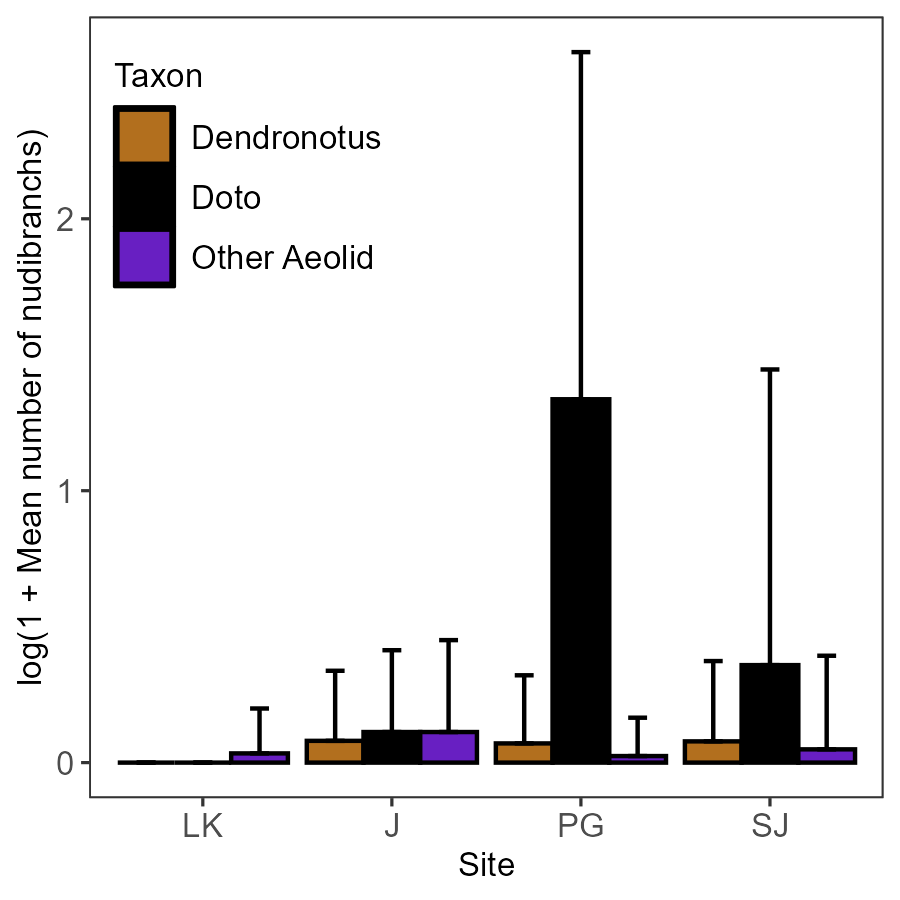

In [3704]:
# Convert images to base64
plot_nudie_types_site <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_types_site.png")

# Create the HTML (vertical display)
html_plot_nudie_types_site <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_nudie_types_site, "' alt='Plot of Nudibranch count by Site and Taxon'>
")

# Display the HTML
IRdisplay::display_html(html_plot_nudie_types_site)

### Microhabitat-Level Comparisons

#### **Mean Counts by Microhabitat**

In [3705]:
#--------------------------------------
pod_counts_combined <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(
    n = n(),
    Mean_Count = mean(Count_Pod, na.rm = TRUE),
    SD_Count = sd(Count_Pod, na.rm = TRUE),
    .groups = "drop"
  )

In [3706]:

html_table <- pod_counts_combined %>%
  kbl(caption = "Summary Statistics for Pod Count by Microhabitat") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)

Microhabitat,n,Mean_Count,SD_Count
Algae,80,0.2500000,0.6264224
Hydrallmania,67,0.2835821,0.6468097
Lafoea,57,0.6666667,1.3540064
Other,50,0.2400000,1.1703828
Sertulariidae,63,0.4126984,1.4214364
Sertulariidae_BRYO,38,0.7105263,1.0109641


In [3707]:

# Kruskal-Wallis and Dunn's
kw_result <- kruskal.test(Count_Pod ~ Microhabitat, data = data_count_clean)
dunn_result <- dunnTest(Count_Pod ~ Microhabitat, data = data_count_clean, method = "bonferroni")

# Format Kruskal-Wallis result as a one-row tibble
kw_table <- tibble(
  Test = "Kruskal-Wallis",
  Statistic = round(kw_result$statistic, 3),
  Df = kw_result$parameter,
  P_value = signif(kw_result$p.value, 3)
)

# Get Dunn’s test table
dunn_table <- dunn_result$res %>%
  rename(
    Comparison = Comparison,
    Z = Z,
    P_unadjusted = P.unadj,
    P_bonferroni = P.adj
  ) %>%
  mutate(across(where(is.numeric), round, 3))

In [3708]:

# Combine both: show Kruskal result above Dunn’s table
html_table <- list(
  kbl(kw_table, caption = "Kruskal-Wallis Test Summary") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria"),
  
  kbl(dunn_table, caption = "Dunn’s Post Hoc Test (Bonferroni-adjusted)") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria")
) %>%
  lapply(as.character) %>%
  paste(collapse = "<br><br>")  # add spacing between tables

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)


Test,Statistic,Df,P_value
Kruskal-Wallis,19.558,5,0.00151
Comparison,Z,P_unadjusted,P_bonferroni
Algae - Hydrallmania,-0.425,0.671,1.000
Algae - Lafoea,-2.189,0.029,0.429
Hydrallmania - Lafoea,-1.715,0.086,1.000
Algae - Other,1.076,0.282,1.000
Hydrallmania - Other,1.415,0.157,1.000
Lafoea - Other,2.959,0.003,0.046
Algae - Sertulariidae,0.017,0.987,1.000
Hydrallmania - Sertulariidae,0.417,0.676,1.000


In [3709]:

# Define custom order for microhabitat categories
custom_order <- c("Algae", "Sertulariidae_BRYO", "Sertulariidae", "Lafoea", "Hydrallmania","Other" )

pod_counts_combined_clean <- pod_counts_combined %>%
  mutate(Microhabitat = factor(Microhabitat, levels = custom_order))

# Fill and outline colors (consistent with nudie plot style)
fill_colors <- c(
  "Algae" = "#c54d43",               # lighter red-orange
  "Sertulariidae_BRYO" = "#85c0df",  # light blue
  "Sertulariidae" = "#e78946",       # light brown-orange
  "Lafoea" = "#e78946",
  "Hydrallmania" = "#e78946",
  "Other" = "#e78946"
)

outline_colors <- c(
  "Algae" = "#a6291e",               # dark red
  "Sertulariidae_BRYO" = "#0283d9",  # dark blue
  "Sertulariidae" = "#E66101",       # dark orange-brown
  "Lafoea" = "#E66101",
  "Hydrallmania" = "#E66101",
  "Other" = "#E66101"
)

# Apply manual fill and outline colors using Microhabitat
pod_counts_combined_clean <- pod_counts_combined_clean %>%
  mutate(
    fill_color = fill_colors[Microhabitat],
    outline_color = outline_colors[Microhabitat]
  )

# Final updated plot
plot_count_microhabitat <- ggplot(pod_counts_combined_clean, aes(x = Microhabitat, y = Mean_Count)) +
  geom_bar(
    stat = "identity",
    aes(fill = fill_color, color = outline_color),
    width = 0.8,
    linewidth = 0.6,
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(ymin = Mean_Count, ymax = Mean_Count + SD_Count, color = outline_color),
    width = 0.3,
    position = position_dodge(width = 0.9),
    linewidth = 0.6
  ) +
  scale_fill_identity() +
  scale_color_identity() +
  scale_x_discrete(labels = microhabitat_labels) +
  labs(
    title = NULL,
    x = "Microhabitat",
    y = expression("Mean number of " * italic("P. cristatus"))
  ) +
  ggtitle("B") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    plot.title = element_text(size = 14),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_count_microhabitat.png", plot = plot_count_microhabitat, width = 3, height = 3, units = "in", dpi = 300)



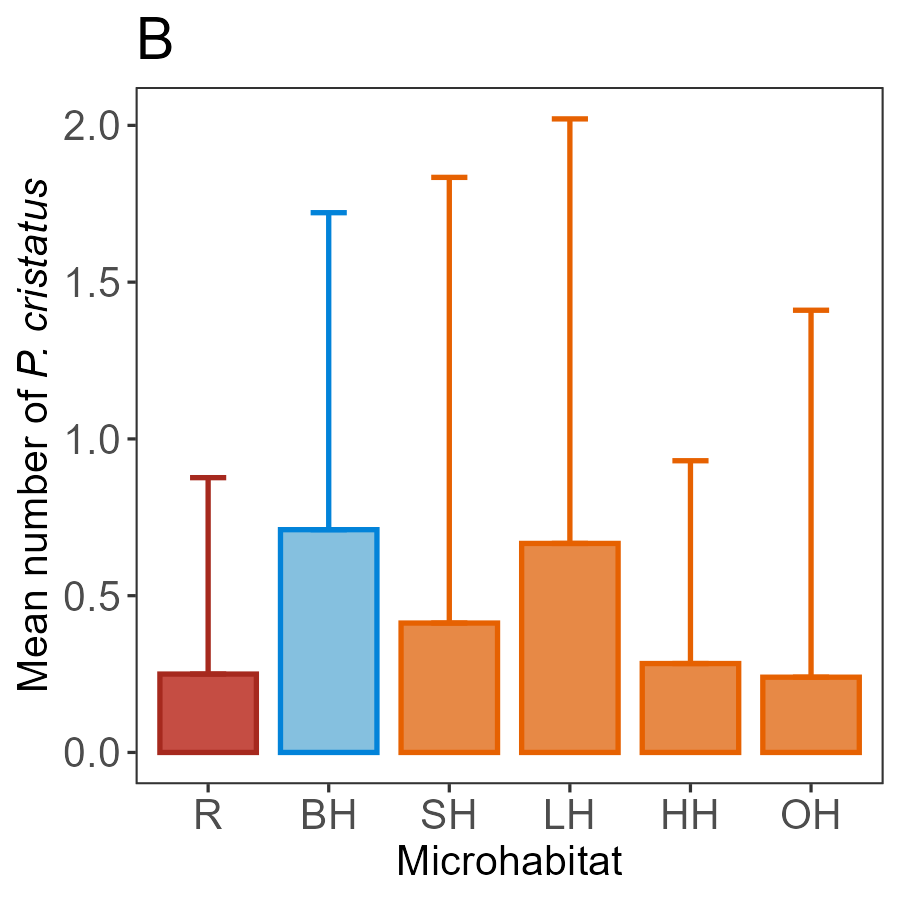

In [3710]:

# Convert images to base64
plot_count_microhabitat <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_count_microhabitat.png")

# Create the HTML (vertical display)
html_plot_count_microhabitat <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_count_microhabitat, "' alt='Plot of Count by Microhabitat'>
")

# Display the HTML
IRdisplay::display_html(html_plot_count_microhabitat)


#### **Sex Ratio by Microhabitat**

In [3711]:

#--------------------------------------
# Compute sex proportions per quadrat within each Microhabitat
sex_prop_long <- data_count_clean %>%
  mutate(
    Total = Count_Pod_M + Count_Pod_F
  ) %>%
  filter(Total > 0) %>%
  mutate(
    Male     = Count_Pod_M / Total,
    Female   = Count_Pod_F / Total,
  ) %>%
  pivot_longer(
    cols = c(Male, Female),
    names_to = "Sex",
    values_to = "Proportion"
  )

# Summarize mean ± SD/SE per sex per microhabitat
sex_summary <- sex_prop_long %>%
  group_by(Microhabitat, Sex) %>%
  summarise(
    Mean = mean(Proportion, na.rm = TRUE),
    SD = sd(Proportion, na.rm = TRUE),
    N = n(),
    SE = SD / sqrt(N),
    .groups = "drop"
  )

In [3712]:

html_table <- sex_summary %>%
  kbl(caption = "Summary Statistics for Sex Proportions") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)

Microhabitat,Sex,Mean,SD,N,SE
Algae,Female,0.2361111,0.3922116,12,0.1132217
Algae,Male,0.7638889,0.3922116,12,0.1132217
Hydrallmania,Female,0.4444444,0.4513355,12,0.1302893
Hydrallmania,Male,0.5555556,0.4513355,12,0.1302893
Lafoea,Female,0.4895833,0.4506323,16,0.1126581
Lafoea,Male,0.5104167,0.4506323,16,0.1126581
Other,Female,0.6333333,0.3214550,3,0.1855921
Other,Male,0.3666667,0.3214550,3,0.1855921
Sertulariidae,Female,0.4444444,0.3726780,7,0.1408590
Sertulariidae,Male,0.5555556,0.3726780,7,0.1408590


In [3713]:

# Chi-squared test on sex proportions per microhabitat
sex_ratio_table <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(
    Male = sum(Count_Pod_M, na.rm = TRUE),
    Female = sum(Count_Pod_F, na.rm = TRUE),
    .groups = "drop"
  )

# Create contingency matrix and run chi-square test
sex_matrix <- sex_ratio_table %>%
  column_to_rownames("Microhabitat") %>%
  as.matrix()

sex_chi_test <- chisq.test(sex_matrix)

Warning message in chisq.test(sex_matrix):
"Chi-squared approximation may be incorrect"


In [3714]:

# Format chi-square result as a tibble
chi_table <- tibble(
  Test = "Chi-squared Test",
  X_squared = round(sex_chi_test$statistic, 3),
  Df = sex_chi_test$parameter,
  P_value = signif(sex_chi_test$p.value, 4)
)

In [3715]:

# Create and display the HTML table
html_table <- kbl(chi_table, caption = "Chi-squared Test of Sex Ratio by Microhabitat") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Test,X_squared,Df,P_value
Chi-squared Test,5.223,5,0.3893


In [3716]:

# Define sex colors and label background colors
pod_colors <- c("Male" = "#999999", "Female" = "#f38c8c")
label_colors <- c("R" = "#a6291e", "BH" = "#0283d9", "SH" = "#E66101", 
                  "LH" = "#E66101", "H" = "#E66101", "OH" = "#E66101")

# Prepare data
sex_summary_clean <- sex_summary %>%
  filter(Sex %in% c("Male", "Female")) %>%
  mutate(
    Sex = factor(Sex, levels = c("Male", "Female")),
    Microhabitat = recode(Microhabitat,
      "Sertulariidae" = "SH",
      "Sertulariidae_BRYO" = "BH",
      "Algae" = "R",
      "Hydrallmania" = "H",
      "Lafoea" = "LH",
      "Other" = "OH"),
    Microhabitat = factor(Microhabitat, levels = c("R", "BH", "SH", "LH", "H", "OH"))
  )

# Base plot
plot_sex_microhabitat <- ggplot(sex_summary_clean, aes(x = Microhabitat, y = Mean, fill = Sex)) +
  geom_col(position = position_dodge(width = 0.7), width = 0.7, color = "black") +
  geom_errorbar(aes(ymin = Mean, ymax = Mean + SD), width = 0.3,
                position = position_dodge(width = 0.7)) +
  scale_fill_manual(values = pod_colors) +
  labs(
    x = "Microhabitat",
    y = expression("Mean number of " * italic("P. cristatus")),
    fill = "Sex"
  ) +
  theme_bw(base_size = 8) +
  theme(
    panel.grid = element_blank(),
    axis.text.x = element_text(size = 8, face = "bold", margin = margin(t = 6)),
    axis.title.x = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    plot.margin = margin(5.5, 5.5, 30, 5.5),  # More space for boxes
    legend.position = "none"
  )

# Add thick background boxes behind x-axis labels
x_positions <- 1:length(levels(sex_summary_clean$Microhabitat))
x_labels <- levels(sex_summary_clean$Microhabitat)

for (i in seq_along(x_labels)) {
  plot_sex_microhabitat <- plot_sex_microhabitat +
    annotation_custom(
      grob = rectGrob(gp = gpar(fill = label_colors[[x_labels[i]]], col = NA)),
      xmin = x_positions[i] - 0.4,
      xmax = x_positions[i] + 0.4,
      ymin = -0.25,  # lower bound of box
      ymax = -0.02   # upper bound = thicker box
    )
}



ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_microhabitat.png", plot = plot_sex_microhabitat, width = 3, height = 3, units = "in", dpi = 300)



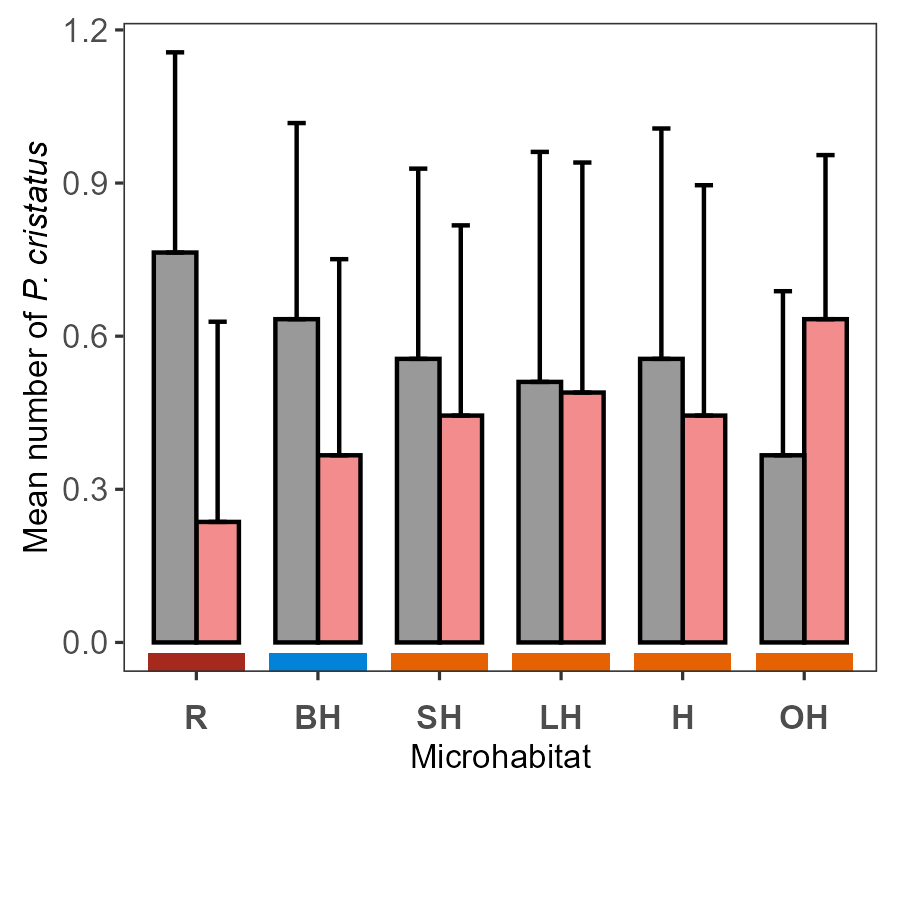

In [3717]:

  
# Convert images to base64
plot_sex_microhabitat <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_microhabitat.png")

# Create the HTML (vertical display)
html_plot_sex_microhabitat <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_sex_microhabitat, "' alt='Plot of Sex Ratio by Microhabitat'>
")

# Display the HTML
IRdisplay::display_html(html_plot_sex_microhabitat)



#### **Morph Ratio by Microhabitat**


In [3718]:

#--------------------------------------
# Compute morph proportions per quadrat within each Microhabitat
morph_prop_long <- data_count_clean %>%
  mutate(
    Total = Count_Pod_RB + Count_Pod_W + Count_Pod_Bright + Count_Pod_Other
  ) %>%
  filter(Total > 0) %>%
  mutate(
    Red_Beige     = Count_Pod_RB / Total,
    White   = Count_Pod_W / Total,
    Bright     = Count_Pod_Bright / Total,
    Other   = Count_Pod_Other / Total,
  ) %>%
  pivot_longer(
    cols = c(Red_Beige, White, Bright, Other),
    names_to = "Morph2",
    values_to = "Proportion"
  )

# Summarize mean ± SD/SE per morph per microhabitat
morph_summary <- morph_prop_long %>%
  group_by(Microhabitat, Morph2) %>%
  summarise(
    Mean = mean(Proportion, na.rm = TRUE),
    SD = sd(Proportion, na.rm = TRUE),
    N = n(),
    SE = SD / sqrt(N),
    .groups = "drop"
  )

In [3719]:

html_table <- morph_summary %>%
  kbl(caption = "Summary Statistics for Morph Proportions") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)

Microhabitat,Morph2,Mean,SD,N,SE
Algae,Bright,0.0000000,0.0000000,13,0.0000000
Algae,Other,0.0769231,0.2773501,13,0.0769231
Algae,Red_Beige,0.7692308,0.3881250,13,0.1076465
Algae,White,0.1538462,0.3152126,13,0.0874242
Hydrallmania,Bright,0.1025641,0.2849501,13,0.0790309
Hydrallmania,Other,0.0384615,0.1386750,13,0.0384615
Hydrallmania,Red_Beige,0.6666667,0.4249183,13,0.1178511
Hydrallmania,White,0.1923077,0.3252218,13,0.0902003
Lafoea,Bright,0.0000000,0.0000000,18,0.0000000
Lafoea,Other,0.0000000,0.0000000,18,0.0000000


In [3720]:

# Chi-squared test on morph proportions per microhabitat
morph_ratio_table <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(
    Red_Beige = sum(Count_Pod_RB, na.rm = TRUE),
    White = sum(Count_Pod_W, na.rm = TRUE),
    Bright = sum(Count_Pod_Bright, na.rm = TRUE),
    Other = sum(Count_Pod_Other, na.rm = TRUE),
    .groups = "drop"
  )

# Create contingency matrix and run chi-square test
morph_matrix <- morph_ratio_table %>%
  column_to_rownames("Microhabitat") %>%
  as.matrix()

morph_chi_test <- chisq.test(morph_matrix)

Warning message in chisq.test(morph_matrix):
"Chi-squared approximation may be incorrect"


In [3721]:

# Format chi-square result as a tibble
chi_table <- tibble(
  Test = "Chi-squared Test",
  X_squared = round(morph_chi_test$statistic, 3),
  Df = morph_chi_test$parameter,
  P_value = signif(morph_chi_test$p.value, 4)
)

In [3722]:

# Create and display the HTML table
html_table <- kbl(chi_table, caption = "Chi-squared Test of Morph Ratio by Microhabitat") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)


Test,X_squared,Df,P_value
Chi-squared Test,16.494,15,0.35


In [3723]:

pod_colors <- c("Red_Beige" = "indianred", "White" = "lightblue4", "Bright" = "darkorange", "Other" = "#009E73")

# Cleaned and corrected data prep
morph_summary_clean <- morph_summary %>%
  filter(Morph2 %in% c("Red_Beige", "White", "Bright", "Other")) %>%  # ensure only valid morphs
  mutate(
    Morph2 = factor(Morph2, levels = c("Red_Beige", "White", "Bright", "Other")),
    Microhabitat = recode(Microhabitat,
                          "Sertulariidae" = "SH",
                          "Sertulariidae_BRYO" = "BH",
                          "Algae" = "R",
                          "Hydrallmania" = "H",
                          "Lafoea" = "LH",
                          "Other" = "OH"),
    Microhabitat = factor(Microhabitat, levels = c("R", "BH", "SH", "LH", "H", "OH"))
  )

# Plot
plot_morph_microhabitat <- ggplot(morph_summary_clean, aes(x = Microhabitat, y = Mean, fill = Morph2)) +
  geom_col(position = position_dodge(width = 0.7), width = 0.7, color = "black") +
  geom_errorbar(aes(ymin = Mean, ymax = Mean + SD),
                width = 0.3, position = position_dodge(width = 0.8)) +
  scale_fill_manual(values = pod_colors) +
  labs(
    x = "Microhabitat",
    y = expression("Mean Proportion of " * italic("P. cristatus")),
    fill = "Sex"
  ) +
  ggtitle("R") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_microhabitat.png", plot = plot_morph_microhabitat, width = 3, height = 3, units = "in", dpi = 300)



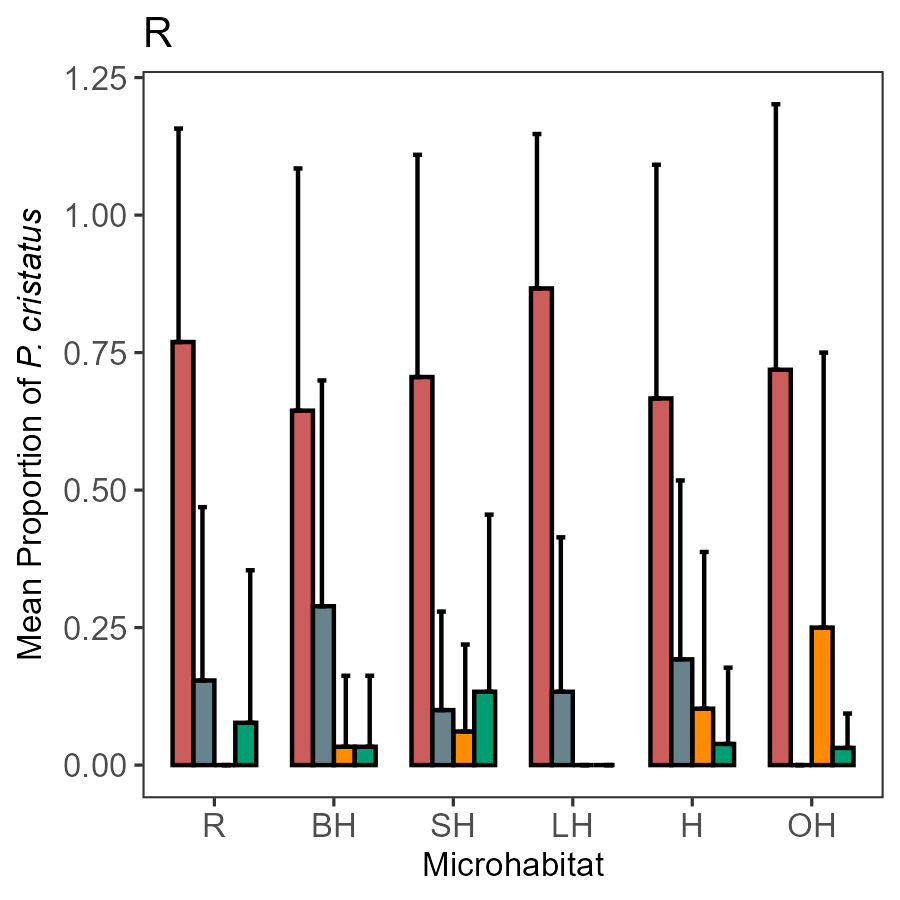

In [3724]:

# Convert images to base64
plot_morph_microhabitat <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_morph_microhabitat.png")

# Create the HTML (vertical display)
html_plot_morph_microhabitat <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_morph_microhabitat, "' alt='Plot of Morph Ratio by Microhabitat'>
")

# Display the HTML
IRdisplay::display_html(html_plot_morph_microhabitat)



#### **Aeolid Nudibranch Counts by Microhabitat**


In [3725]:

#--------------------------------------
nudie_counts_combined <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(
    n = n(),
    Mean_Count = mean(Count_Nudie_Aeolid, na.rm = TRUE),
    SD_Count = sd(Count_Nudie_Aeolid, na.rm = TRUE),
    .groups = "drop"
  )


In [3726]:

html_table <- nudie_counts_combined %>%
  kbl(caption = "Summary Statistics for Aeolid Nudibranch Count by Microhabitat") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Microhabitat,n,Mean_Count,SD_Count
Algae,80,0.0250000,0.1571100
Hydrallmania,67,0.5223881,1.1058825
Lafoea,57,3.9473684,11.8040868
Other,50,0.4400000,1.0720950
Sertulariidae,63,0.9682540,4.3178857
Sertulariidae_BRYO,38,0.2894737,0.6939076


In [3727]:

# Kruskal-Wallis and Dunn's
kw_result <- kruskal.test(Count_Nudie_Aeolid ~ Microhabitat, data = data_count_clean)
dunn_result <- dunnTest(Count_Nudie_Aeolid ~ Microhabitat, data = data_count_clean, method = "bonferroni")

# Format Kruskal-Wallis result as a one-row tibble
kw_table <- tibble(
  Test = "Kruskal-Wallis",
  Statistic = round(kw_result$statistic, 3),
  Df = kw_result$parameter,
  P_value = signif(kw_result$p.value, 3)
)

# Get Dunn’s test table
dunn_table <- dunn_result$res %>%
  rename(
    Comparison = Comparison,
    Z = Z,
    P_unadjusted = P.unadj,
    P_bonferroni = P.adj
  ) %>%
  mutate(across(where(is.numeric), round, 3))

In [3728]:

# Combine both: show Kruskal result above Dunn’s table
html_table <- list(
  kbl(kw_table, caption = "Kruskal-Wallis Test Summary") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria"),
  
  kbl(dunn_table, caption = "Dunn’s Post Hoc Test (Bonferroni-adjusted)") %>%
    kable_classic(full_width = FALSE, html_font = "Cambria")
) %>%
  lapply(as.character) %>%
  paste(collapse = "<br><br>")  # add spacing between tables

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)


Test,Statistic,Df,P_value
Kruskal-Wallis,28.507,5,2.9e-05
Comparison,Z,P_unadjusted,P_bonferroni
Algae - Hydrallmania,-3.946,0.000,0.001
Algae - Lafoea,-4.936,0.000,0.000
Hydrallmania - Lafoea,-1.121,0.262,1.000
Algae - Other,-2.466,0.014,0.205
Hydrallmania - Other,1.118,0.264,1.000
Lafoea - Other,2.121,0.034,0.508
Algae - Sertulariidae,-2.521,0.012,0.176
Hydrallmania - Sertulariidae,1.304,0.192,1.000


In [3729]:


# Define custom order for microhabitat categories
custom_order <- c("Algae", "Sertulariidae_BRYO", "Sertulariidae", "Lafoea", "Hydrallmania","Other" )

nudie_counts_combined_clean <- nudie_counts_combined %>%
  mutate(Microhabitat = factor(Microhabitat, levels = custom_order))

 # Fill and outline colors (manual)
fill_colors <- c(
  "Algae" = "#c54d43",               # lighter orange
  "Sertulariidae_BRYO" = "#85c0df",  # lighter blue
  "Sertulariidae" = "#e78946",       # lighter brown
  "Lafoea" = "#e78946",
  "Hydrallmania" = "#e78946",
  "Other" = "#e78946"
)

outline_colors <- c(
  "Algae" = "#a6291e",               # dark red
  "Sertulariidae_BRYO" = "#0283d9",  # dark blue
  "Sertulariidae" = "#E66101",       # dark brown
  "Lafoea" = "#E66101",
  "Hydrallmania" = "#E66101",
  "Other" = "#E66101"
)

# X-axis labels for display
microhabitat_labels <- c(
  "Algae" = "R",
  "Sertulariidae_BRYO" = "BH",
  "Sertulariidae" = "SH",
  "Lafoea" = "LH",
  "Hydrallmania" = "HH",
  "Other" = "OH"
)

# Apply order and add fill/outline colors
nudie_counts_combined_clean <- nudie_counts_combined %>%
  mutate(
    Microhabitat = factor(Microhabitat, levels = custom_order),
    fill_color = fill_colors[Microhabitat],
    outline_color = outline_colors[Microhabitat]
  )

# Build the plot
plot_nudie_microhabitat <- ggplot(nudie_counts_combined_clean, aes(x = Microhabitat, y = Mean_Count)) +
  geom_bar(
    stat = "identity",
    aes(fill = fill_color, color = outline_color),
    width = 0.8,
    linewidth = 0.6,
    position = position_dodge(width = 0.9)
  ) +
  geom_errorbar(
    aes(ymin = Mean_Count, ymax = Mean_Count + SD_Count, color = outline_color),
    width = 0.3,
    position = position_dodge(width = 0.9),
    linewidth = 0.6
  ) +
  scale_fill_identity() +
  scale_color_identity() +
  scale_x_discrete(labels = microhabitat_labels) +
  labs(
    x = "Microhabitat",
    y = "Mean number of aeolid nudibranchs"
  ) +
  ggtitle("C") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    axis.text.x = element_text(size = 10),
    axis.title.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    axis.title.y = element_text(size = 10),
    strip.text = element_text(face = "bold", size = 10),
    panel.spacing = unit(0.5, "lines"),
    plot.title = element_text(size = 14),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_microhabitat.png", plot = plot_nudie_microhabitat, width = 3, height = 3, units = "in", dpi = 300)



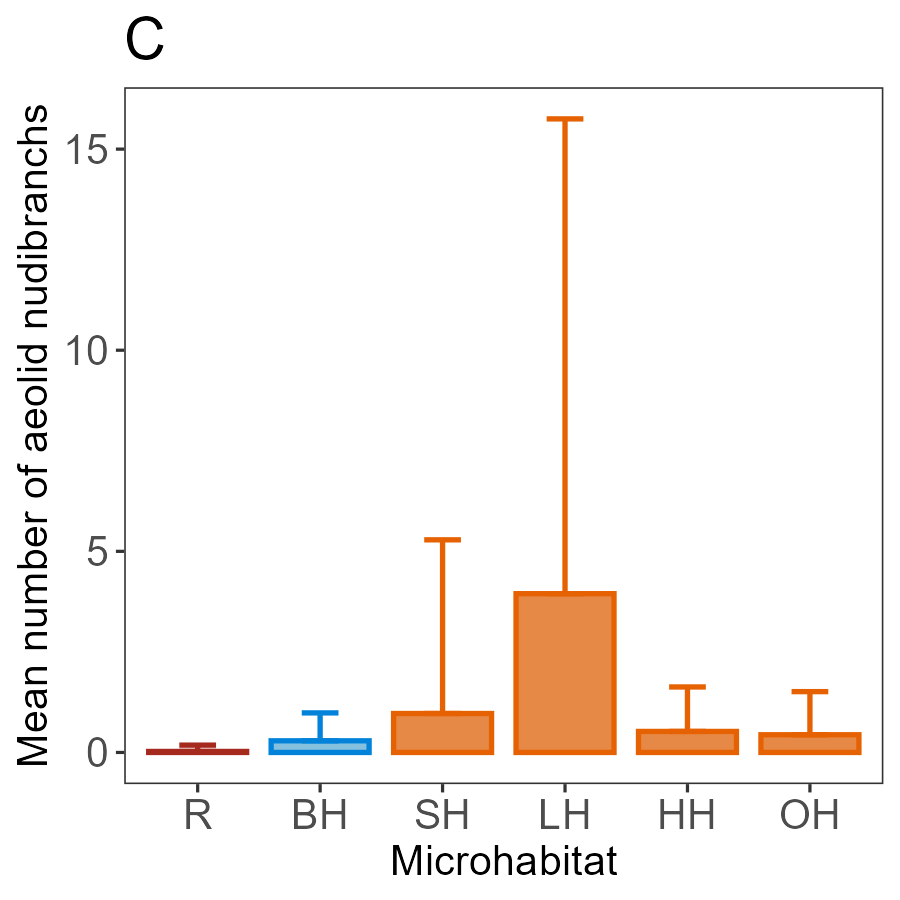

In [3730]:
# Convert images to base64
plot_nudie_microhabitat <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_microhabitat.png")

# Create the HTML (vertical display)
html_plot_nudie_microhabitat <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_nudie_microhabitat, "' alt='Plot of Nudibranch count by Microhabitat'>
")

# Display the HTML
IRdisplay::display_html(html_plot_nudie_microhabitat)

In [3731]:

# Extra visualization of Aeolid nudibranchs by type (done on log scale to see data better)
#--------------------------------------

nudie_counts_combined <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(
    Mean_Nudie_Dendronotus_Count = mean(Count_Nudie_Dendronotus, na.rm = TRUE),
    SD_Nudie_Dendronotus_Count = sd(Count_Nudie_Dendronotus, na.rm = TRUE),
    Mean_Nudie_Doto_Count = mean(Count_Nudie_Doto, na.rm = TRUE),
    SD_Nudie_Doto_Count = sd(Count_Nudie_Doto, na.rm = TRUE),
    Mean_Nudie_Aeolid_Other_Count = mean(Count_Nudie_Aeolid_Other, na.rm = TRUE),
    SD_Nudie_Aeolid_Other_Count = sd(Count_Nudie_Aeolid_Other, na.rm = TRUE),
    .groups = "drop"
  ) %>%
  pivot_longer(cols = c(Mean_Nudie_Dendronotus_Count, Mean_Nudie_Doto_Count, Mean_Nudie_Aeolid_Other_Count), names_to = "Taxon", values_to = "Mean_Count") %>%
  pivot_longer(cols = c(SD_Nudie_Dendronotus_Count, SD_Nudie_Doto_Count, SD_Nudie_Aeolid_Other_Count), names_to = "SD_Taxon", values_to = "SD_Count") %>%
  filter(Taxon == gsub("SD_", "Mean_", SD_Taxon))

nudie_ratio_table <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(
    Dendronotus = sum(Count_Nudie_Dendronotus, na.rm = TRUE),
    Doto = sum(Count_Nudie_Doto, na.rm = TRUE),
    Aeolid_Other = sum(Count_Nudie_Aeolid_Other, na.rm = TRUE)
  )


In [3732]:

html_table <- nudie_ratio_table %>%
  kbl(caption = "Summary Statistics for Nudibranch Count by Microhabitat") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)


Microhabitat,Dendronotus,Doto,Aeolid_Other
Algae,0,2,0
Hydrallmania,14,19,2
Lafoea,1,219,5
Other,1,14,7
Sertulariidae,4,52,5
Sertulariidae_BRYO,6,3,2


In [3733]:


nudie_colors <- c("Mean_Nudie_Dendronotus_Count" = "#b26f1e", "Mean_Nudie_Doto_Count" = "#000000", "Mean_Nudie_Aeolid_Other_Count" = "#681fc2")

nudie_counts_combined$Taxon <- factor(nudie_counts_combined$Taxon,
                                    levels = c("Mean_Nudie_Dendronotus_Count", "Mean_Nudie_Doto_Count", "Mean_Nudie_Aeolid_Other_Count"))

# Cleaned and corrected data prep
nudie_counts_combined_clean <- nudie_counts_combined %>%
  mutate(
    Microhabitat = recode(Microhabitat,
                          "Sertulariidae" = "SH",
                          "Sertulariidae_BRYO" = "BH",
                          "Algae" = "R",
                          "Hydrallmania" = "H",
                          "Lafoea" = "LH",
                          "Other" = "OH"),
    Microhabitat = factor(Microhabitat, levels = c("R", "BH", "SH", "LH", "H", "OH"))
  )

plot_nudie_types_microhabitat <- ggplot(nudie_counts_combined_clean, aes(x = Microhabitat, y = log(1 + Mean_Count), fill = Taxon)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black") +
  geom_errorbar(aes(ymin = log(1 + Mean_Count), ymax = log(1 + Mean_Count + SD_Count)), width = 0.3, position = position_dodge(width = 0.9)) +
  scale_fill_manual(values = nudie_colors, labels = c("Mean_Nudie_Dendronotus_Count" = "Dendronotus", "Mean_Nudie_Doto_Count" = "Doto", "Mean_Nudie_Aeolid_Other_Count" = "Other Aeolid")) +
  labs(title = NULL, 
       x = "Microhabitat", 
       y = "log(1 + Mean number of nudibranchs)", 
       fill = "Taxon") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = c(0.2, 0.8),
    legend.text = element_text(size = 8),
    legend.key.size = unit(0.2, "in")
  )


ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_types_microhabitat.png", plot = plot_nudie_types_microhabitat, width = 3, height = 3, units = "in", dpi = 300)



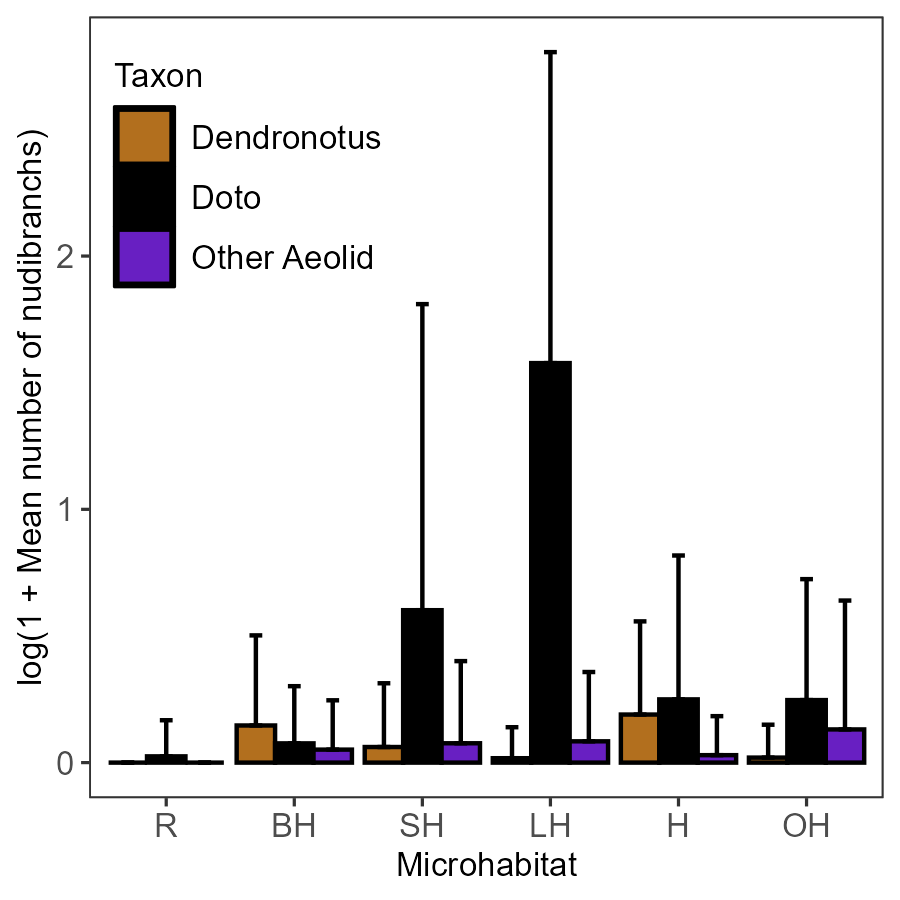

In [3734]:

# Convert images to base64
plot_nudie_types_microhabitat <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_nudie_types_microhabitat.png")

# Create the HTML (vertical display)
html_plot_nudie_types_microhabitat <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_nudie_types_microhabitat, "' alt='Plot of Nudibranch count by Microhabitat and Taxon'>
")

# Display the HTML
IRdisplay::display_html(html_plot_nudie_types_microhabitat)

### 5. Morph Ratios Within Sex
Here, we check whether color morph distributions differ between males and females.

In [3735]:
#--------------------------------------
# Compute morph proportions per quadrat within each Site
morph_prop_long <- data_count_clean %>%
  mutate(Quadrat = row_number()) %>%
  pivot_longer(
    cols = starts_with("Count_Pod_") & !c("Count_Pod_M", "Count_Pod_F"),
    names_to = "Morph2",
    names_prefix = "Count_Pod_",
    values_to = "Count"
  ) %>%
  pivot_longer(
    cols = c(Count_Pod_M, Count_Pod_F),
    names_to = "Sex",
    values_to = "Sex_Count"
  ) %>%
  mutate(
    Sex = recode(Sex,
                 "Count_Pod_M" = "Male",
                 "Count_Pod_F" = "Female"),
    Proportion = Count / Sex_Count
  ) %>%
  filter(!is.na(Proportion), is.finite(Proportion), Sex_Count > 0)

# Summarize mean ± SD/SE per morph per site
morph_summary <- morph_prop_long %>%
  group_by(Sex, Morph2) %>%
  summarise(
    Mean = mean(Proportion, na.rm = TRUE),
    SD = sd(Proportion, na.rm = TRUE),
    N = n(),
    SE = SD / sqrt(N),
    .groups = "drop"
  )


In [3736]:


html_table <- morph_summary %>%
  kbl(caption = "Summary Statistics for Morph Proportions by Sex") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display it as HTML
IRdisplay::display_html(html_table)

Sex,Morph2,Mean,SD,N,SE
Female,Bright,0.1616541,0.4358090,38,0.0706976
Female,Other,0.0394737,0.1793976,38,0.0291021
Female,RB,1.2819549,1.0142323,38,0.1645302
Female,W,0.3314536,0.4562888,38,0.0740198
Male,Bright,0.1041667,0.3566740,48,0.0514815
Male,Other,0.0902778,0.2617416,48,0.0377791
Male,RB,1.0677083,0.6773646,48,0.0977692
Male,W,0.2708333,0.4370882,48,0.0630882


In [3737]:

morph_ratio_table <- tibble(
  Sex = c("Male", "Female"),
  Red_Beige = c(sum(data_count_clean$Count_Pod_RB[data_count_clean$Count_Pod_M > 0], na.rm = TRUE), sum(data_count_clean$Count_Pod_RB[data_count_clean$Count_Pod_F > 0], na.rm = TRUE)),
  White = c(sum(data_count_clean$Count_Pod_W[data_count_clean$Count_Pod_M > 0], na.rm = TRUE), sum(data_count_clean$Count_Pod_W[data_count_clean$Count_Pod_F > 0], na.rm = TRUE)),
  Bright = c(sum(data_count_clean$Count_Pod_Bright[data_count_clean$Count_Pod_M > 0], na.rm = TRUE), sum(data_count_clean$Count_Pod_Bright[data_count_clean$Count_Pod_F > 0], na.rm = TRUE)),
  Other = c(sum(data_count_clean$Count_Pod_Other[data_count_clean$Count_Pod_M > 0], na.rm = TRUE), sum(data_count_clean$Count_Pod_Other[data_count_clean$Count_Pod_F > 0], na.rm = TRUE))
)

# Create contingency matrix and run chi-square
morph_matrix <- morph_ratio_table %>%
  column_to_rownames("Sex") %>%
  as.matrix()

morph_chi_test <- chisq.test(morph_matrix)


Warning message in chisq.test(morph_matrix):
"Chi-squared approximation may be incorrect"


In [3738]:
# Format test result as a tibble
chi_table <- tibble(
  Test = "Chi-squared Test",
  X_squared = round(morph_chi_test$statistic, 3),
  Df = morph_chi_test$parameter,
  P_value = signif(morph_chi_test$p.value, 4)
)

In [3739]:

# Create and display the HTML table
html_table <- kbl(chi_table, caption = "Chi-squared Test of Morph Ratio by Sex") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML (Jupyter/Quarto)
IRdisplay::display_html(html_table)

Test,X_squared,Df,P_value
Chi-squared Test,1.795,3,0.616


In [3740]:
pod_colors <- c("Male" = "#999999", "Female" = "#f38c8c")

plot_sex_morph <- ggplot(morph_summary, aes(x = Morph2, y = Mean, fill = Sex)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), color = "black", width = 0.8) +
  geom_errorbar(aes(ymin = Mean, ymax = Mean + SD), 
                width = 0.3, position = position_dodge(width = 0.8)) +
  scale_fill_manual(values = pod_colors) +
  labs(
    title = NULL,
    x = "Color Morph",
    y = expression("Mean Proportion of " * italic("P. cristatus")),
    fill = "Sex"
  ) +
  ggtitle("R") +
  theme_bw(base_size = 8) +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )

ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_morph.png", plot = plot_sex_morph, width = 3, height = 3, units = "in", dpi = 300)



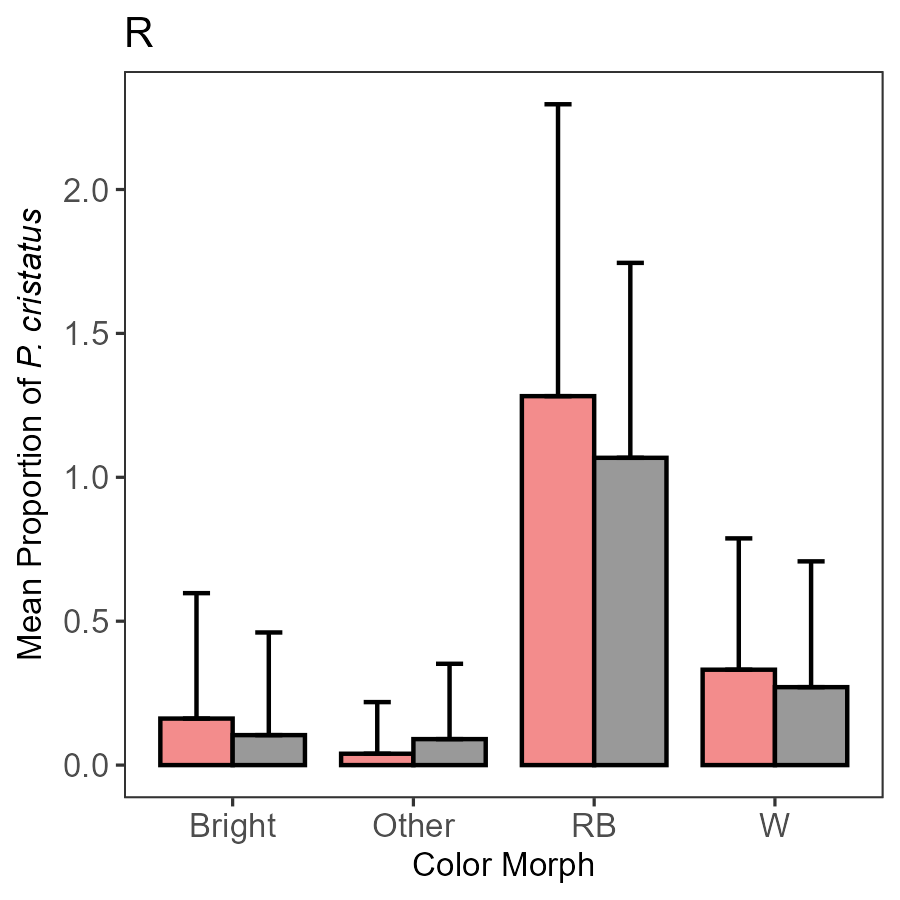

In [3741]:
# Convert images to base64
plot_sex_morph <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_sex_morph.png")



# Create the HTML (vertical display)
html_plot_sex_morph <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_sex_morph, "' alt='Plot of Mean Proportion by Morph and Sex'>
")

# Display the HTML
IRdisplay::display_html(html_plot_sex_morph)

### 6. Occurrence Data
Here, we exclude normality checks and statistical tests for binary presence/absence. We simply visualize occurrence data to guide future GLM analyses.

#### **Pod Occurrence by Site**

In [3742]:
# Calculate proportion present and SD per site
pod_presence_combined <- data_count_clean %>%
  group_by(Site) %>%
  summarise(
    Proportion_Presence = mean(Pod_Presence, na.rm = TRUE),
    SD_Presence = sd(Pod_Presence, na.rm = TRUE),
    .groups = "drop"
  )

# Add number of quadrats per site
quadrat_totals <- data_count_clean %>%
  group_by(Site) %>%
  summarise(Quadrat_Total = n(), .groups = "drop")

# Combine into final table
pod_presence_combined <- pod_presence_combined %>%
  left_join(quadrat_totals, by = "Site")


In [3743]:

# Format as pretty HTML table
html_table <- pod_presence_combined %>%
  kbl(caption = "Summary Statistics for Podocerus cristatus Presence by Site") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML
IRdisplay::display_html(html_table)


Site,Proportion_Presence,SD_Presence,Quadrat_Total
J,0.2023810,0.4041878,84
LK,0.3793103,0.4938040,29
PG,0.3414634,0.4771187,82
SJ,0.1062500,0.3091249,160


In [3744]:

# Cleaned and corrected data prep
pod_presence_combined_clean <- pod_presence_combined %>%
  mutate(
    Site = recode(Site,
                    "J" = "J",
                    "PG" = "PG",
                    "SJ" = "SJ",
                    "LK" = "LK"),
    Site = factor(Site, levels = c("LK", "J", "PG", "SJ"))
  )

plot_occurrence_site <- ggplot(pod_presence_combined_clean, aes(x = Site, y = Proportion_Presence, fill = Site)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", width = 0.8) +
  geom_errorbar(aes(ymin = Proportion_Presence, ymax = Proportion_Presence + SD_Presence), 
                width = 0.3, position = position_dodge(width = 0.9)) +
  geom_text(aes(label = paste0("n = ", Quadrat_Total), 
                y = 1.05),
            vjust = 0, size = 2) +
  scale_fill_manual(values = rep("black", length(unique(pod_presence_combined_clean$Site)))) +
  labs(title = NULL, 
       x = "Site", 
       y = expression("Proportion Quadrats with " * italic("P. cristatus")),
       fill = "Site") +
  theme_bw(base_size = 8) +
  ggtitle("S") +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )


ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_occurrence_site.png", plot = plot_occurrence_site, width = 3, height = 3, units = "in", dpi = 300)


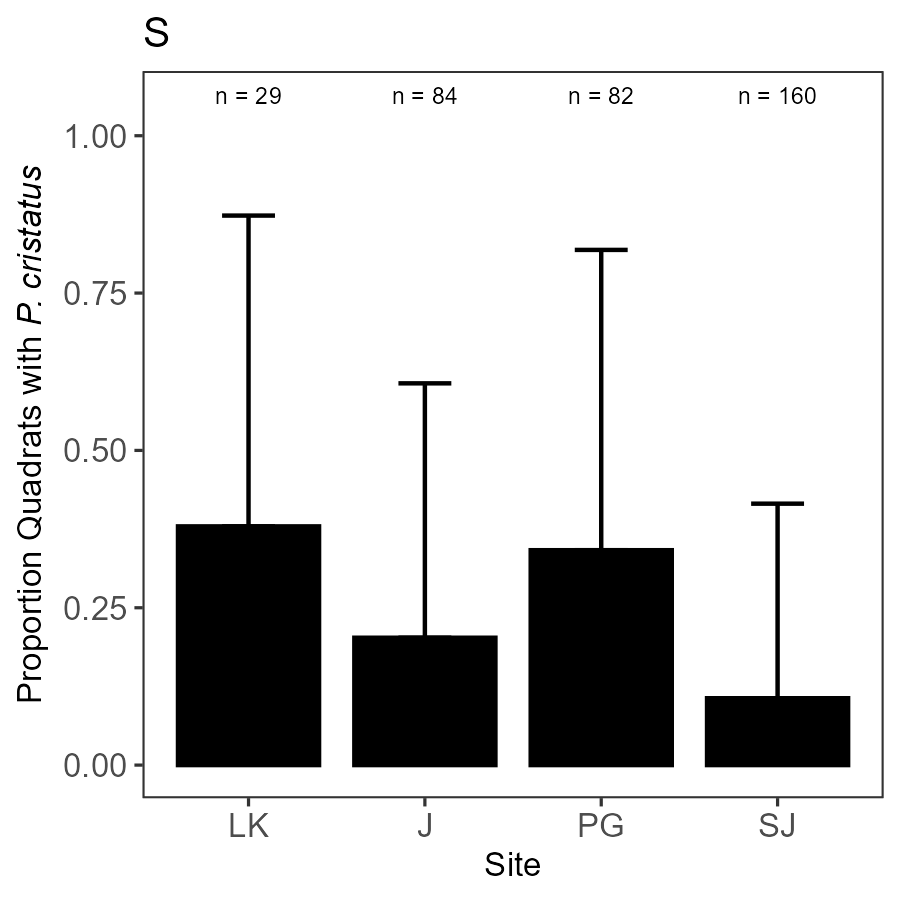

In [3745]:
# Convert images to base64
plot_occurrence_site <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_occurrence_site.png")

# Create the HTML (vertical display)
html_plot_occurrence_site <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_occurrence_site, "' alt='Plot of Pod Occurrence by Site'>
")

# Display the HTML
IRdisplay::display_html(html_plot_occurrence_site)

#### **Pod Occurrence by Microhabitat**

In [3746]:
# Calculate proportion present and SD per site
pod_presence_combined <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(
    Proportion_Presence = mean(Pod_Presence, na.rm = TRUE),
    SD_Presence = sd(Pod_Presence, na.rm = TRUE),
    .groups = "drop"
  )

# Add number of quadrats per site
quadrat_totals <- data_count_clean %>%
  group_by(Microhabitat) %>%
  summarise(Quadrat_Total = n(), .groups = "drop")

# Combine into final table
pod_presence_combined <- pod_presence_combined %>%
  left_join(quadrat_totals, by = "Microhabitat")



In [3747]:
# Format as pretty HTML table
html_table <- pod_presence_combined %>%
  kbl(caption = "Summary Statistics for Podocerus cristatus Presence by Microhabitat") %>%
  kable_classic(full_width = FALSE, html_font = "Cambria") %>%
  as.character()

# Display in HTML
IRdisplay::display_html(html_table)


Microhabitat,Proportion_Presence,SD_Presence,Quadrat_Total
Algae,0.1625000,0.3712364,80
Hydrallmania,0.1940299,0.3984366,67
Lafoea,0.3157895,0.4689614,57
Other,0.0800000,0.2740475,50
Sertulariidae,0.1587302,0.3683594,63
Sertulariidae_BRYO,0.3947368,0.4953554,38


In [3748]:

# Cleaned and corrected data prep
pod_presence_combined_clean <- pod_presence_combined %>%
  mutate(
    Microhabitat = recode(Microhabitat,
                          "Sertulariidae" = "SH",
                          "Sertulariidae_BRYO" = "BH",
                          "Algae" = "R",
                          "Hydrallmania" = "H",
                          "Lafoea" = "LH",
                          "Other" = "OH"),
    Microhabitat = factor(Microhabitat, levels = c("R", "BH", "SH", "LH", "H", "OH"))
  )

plot_occurrence_microhabitat <- ggplot(pod_presence_combined_clean, aes(x = Microhabitat, y = Proportion_Presence, fill = Microhabitat)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9), color = "black", width = 0.8) +
  geom_errorbar(aes(ymin = Proportion_Presence, ymax = Proportion_Presence + SD_Presence), 
                width = 0.3, position = position_dodge(width = 0.9)) +
  geom_text(aes(label = paste0("n = ", Quadrat_Total), 
                y = 1.05),
            vjust = 0, size = 2) +
  scale_fill_manual(values = rep("black", length(unique(pod_presence_combined_clean$Microhabitat)))) +
  labs(title = NULL, 
       x = NULL, 
       y = expression("Proportion Quadrats with " * italic("P. cristatus")), 
       fill = "Microhabitat") +
  theme_bw(base_size = 8) +
  ggtitle("S") +
  theme(
    panel.grid.major = element_blank(), 
    panel.grid.minor = element_blank(), 
    panel.background = element_rect(fill = "white", color = "black"),
    axis.text.x = element_text(size = 8),
    axis.title.x = element_text(size = 8),
    axis.text.y = element_text(size = 8),
    axis.title.y = element_text(size = 8),
    plot.title = element_text(size = 10),
    legend.position = "none"
  )


ggsave("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_occurrence_microhabitat.png", plot = plot_occurrence_microhabitat, width = 3, height = 3, units = "in", dpi = 300)


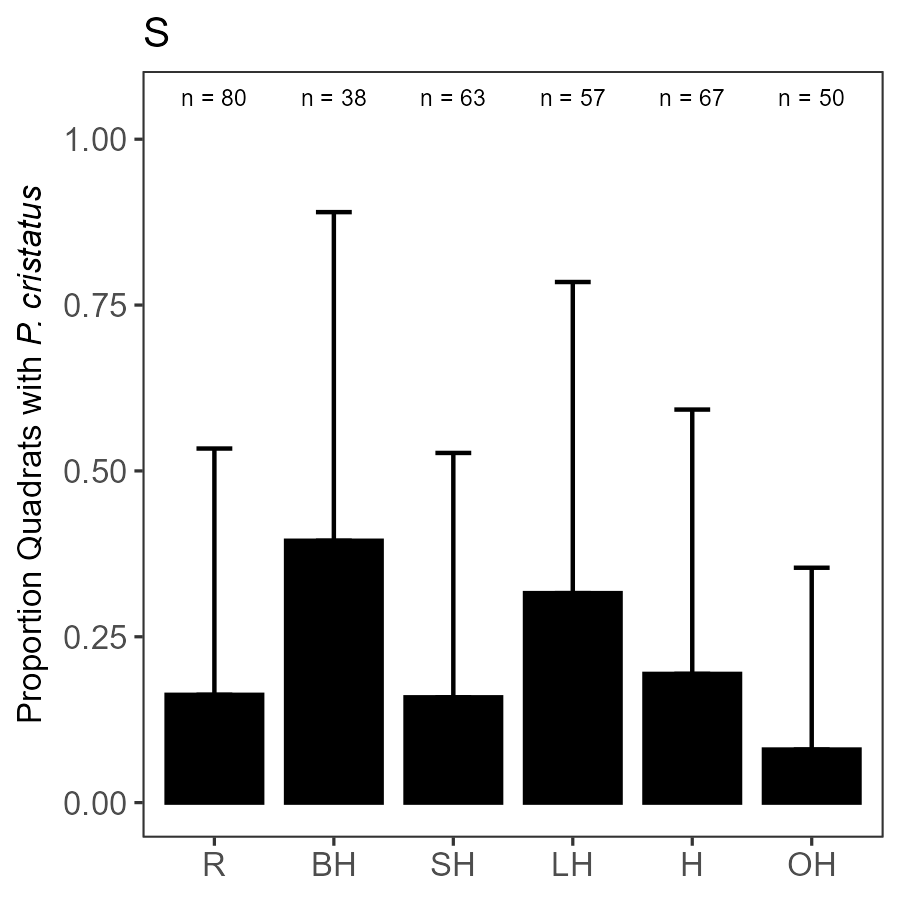

In [3749]:
# Convert images to base64
plot_occurrence_microhabitat <- knitr::image_uri("C:/Users/bmc82/Documents/UF/PhD_Projects/DISSERTATION_MANUSCRIPT/Chapter_3/chapter3_data_analysis/images/plot_occurrence_microhabitat.png")

# Create the HTML (vertical display)
html_plot_occurrence_microhabitat <- paste0("
<style>
  body, html {
    margin: 0; 
    padding: 0;
    /* If you want no horizontal scrollbar: */
    overflow-x: hidden; 
  }
  img {
    max-width: 600px;   /* ~6 inches at 100 dpi screen rendering */
    width: 100%;
    height: auto;
    display: block;
    margin-bottom: 20px;
    border: 1px solid #ccc;
  }
</style>

<img src='", plot_occurrence_microhabitat, "' alt='Plot of Pod Occurrence by Microhabitat'>
")

# Display the HTML
IRdisplay::display_html(html_plot_occurrence_microhabitat)

### 9. Summary and Next Steps
Finally, we summarize the major findings and outline where we go from here.
- Size is significantly different for males and females
- Size is directly related to fecundity in females
- Pod abundance varies significantly across some sites and microhabitats but not between males and females within sites or microhabitats.
- Microhabitat type may play a key role in shaping P. cristatus population distribution.
- Nudibranch distribution may influence P. cristatus occurrence, but it varies by site and microhabitat.
- We will apply a GLMM to account for site, microhabitat, and nudibranch presence.